In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_csv('/content/Dados Appear - Página1 (3).csv')
df


,Data,Category,Ativos,ANR,Falhas,Views,Instalações,Visibility,Total Reviews,Rate,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão
0,2020-01-01,SHOPPING,3135,-,4,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,16,-,28,73.0,15.0,20.5%
1,2020-01-02,SHOPPING,3130,-,2,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,29,-,33,121.0,20.0,16.5%
2,2020-01-03,SHOPPING,3131,-,-,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,31,5,35,122.0,22.0,18.0%
3,2020-01-04,SHOPPING,3129,1,1,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,31,-,35,124.0,20.0,16.1%
4,2020-01-05,SHOPPING,3133,-,-,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,38,-,33,60.0,16.0,26.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,28/10/2020,FINANCE,89168,89168,153,NaN,1346,NaN,NaN,NaN,3260.0,495.0,346.0,416.0,1516.0,6033.0,"3,591",165,Woop Sicredi: conta digital com poupança,715,5,1158,2451.0,685.0,27.9%
6720,29/10/2020,FINANCE,89075,89075,98,NaN,1405,NaN,NaN,NaN,3270.0,491.0,333.0,432.0,1512.0,6038.0,"3,592",174,Woop Sicredi: conta digital com poupança,794,"2,5",1268,2858.0,764.0,26.7%
6721,30/10/2020,FINANCE,89114,89114,195,NaN,1355,NaN,NaN,NaN,3256.0,508.0,342.0,430.0,1506.0,6042.0,"3,592",169,Woop Sicredi: conta digital com poupança,762,"3,4",1239,2737.0,729.0,26.6%
6722,31/10/2020,FINANCE,89072,89072,96,NaN,1083,NaN,NaN,NaN,3257.0,519.0,349.0,429.0,1489.0,6043.0,"3,6",168,Woop Sicredi: conta digital com poupança,595,"4,5",1015,0.0,0.0,0.0%


In [ ]:
def fix_dataframe(df):
  total = df['total']
  df['Ativos'] = df['Ativos'].replace("-",np.nan).str.replace(',','').astype(float)
  df['ANR'] = df['ANR'].replace('-',np.nan).astype(float)
  df['Falhas'] = df['Falhas'].str.replace(".",'').str.replace(",",'').replace("-",np.nan).astype(float)
  df['Instalações'] = df['Instalações'].replace("-",np.nan).str.replace(".","").str.replace(",","").astype(float)
  df['Aquisição de Usuários'] = df['Aquisição de Usuários'].replace('-',np.nan).str.replace(".","").str.replace(",","").astype(float)
  df['Nota Média'] = df['Nota Média'].str.replace(",",".").replace("-",np.nan).astype(float)
  df['Desinstalações'] = df['Desinstalações'].replace("-",np.nan).str.replace(".","").str.replace(",","").astype(float)
  df['Conversão'] = df['Conversão'].str.replace("%","").astype(float)
  df['position'] = df['poisition'].replace("200+",np.nan).astype(float)
  df['Data'] = pd.to_datetime(df['Data'])
  df['score'] = df['score'].str.replace(',','.').astype(float)
  df['oneStarProp'] = df['oneStar'] / df['total']
  df['twoStarsProp'] = df['twoStars'] / total
  df['threeStarsProp'] = df['threeStars'] / total
  df['fourStarsProp'] = df['fourStars'] / total
  df['fiveStarsProp'] = df['fiveStars'] / total
  return df


In [ ]:
df = fix_dataframe(df)

In [ ]:
columns_to_drop = ["Views","Visibility","Total Reviews", "Rate"]
df = df.drop(columns_to_drop, axis= 1)

In [ ]:
"""
apps = df['App'].unique()

aux_df = pd.DataFrame()

for app in apps:
  actual_app = df[df['App'] == app]
  mean_actual_app = actual_app.mean()
  actual_app = actual_app.fillna(mean_actual_app)
  aux_df = pd.concat([aux_df,actual_app],axis = 0)
"""

"\napps = df['App'].unique()\n\naux_df = pd.DataFrame()\n\nfor app in apps:\n  actual_app = df[df['App'] == app]\n  mean_actual_app = actual_app.mean()\n  actual_app = actual_app.fillna(mean_actual_app)\n  aux_df = pd.concat([aux_df,actual_app],axis = 0)\n"

In [ ]:
aux_df = df.dropna()

In [ ]:
aux_df['Ativos'] = aux_df['Ativos'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aux_df['ANR'] = aux_df['ANR'].astype(int)
aux_df['Falhas'] = aux_df['Falhas'].astype(int)
aux_df['fiveStars'] = aux_df['fiveStars'].astype(int)
aux_df['fourStars'] = aux_df['fourStars'].astype(int)
aux_df['threeStars'] = aux_df['threeStars'].astype(int)
aux_df['twoStars'] = aux_df['twoStars'].astype(int)
aux_df['oneStar'] = aux_df['oneStar'].astype(int)
aux_df['total'] = aux_df['total'].astype(int)
aux_df['score'] = round(aux_df['score'],2)
aux_df['Aquisição de Usuários'] = aux_df['Aquisição de Usuários'].astype(int)
aux_df['Desinstalações'] = aux_df['Desinstalações'].astype(int)
aux_df['Visualizações'] = aux_df['Visualizações'].astype(int)
aux_df['Instalações Unicas'] = aux_df['Instalações Unicas'].astype(int)
aux_df['position'] = aux_df['position'].astype(int)
total = aux_df['total']
aux_df['oneStarProp'] = aux_df['oneStar'] / total
aux_df['twoStarsProp'] = aux_df['twoStars'] / total
aux_df['threeStarsProp'] = aux_df['threeStars'] / total
aux_df['fourStarsProp'] = aux_df['fourStars'] / total
aux_df['fiveStarsProp'] = aux_df['fiveStars'] / total

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
aux_df

,Data,Category,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp
217,2020-01-01,SPORTS,68698,8,78,934.0,7178,923,240,40,331,8712,4.67,14,Appito,685,4.89,1447,1566,610,39.0,14,0.037994,0.004591,0.027548,0.105946,0.823921
218,2020-01-02,SPORTS,68598,13,161,1623.0,7188,912,250,30,340,8720,4.67,13,Appito,1198,4.32,1577,2492,1129,45.3,13,0.038991,0.003440,0.028670,0.104587,0.824312
219,2020-01-03,SPORTS,68376,11,287,1580.0,7202,914,251,30,341,8738,4.67,15,Appito,1122,4.58,1710,2327,1026,44.1,15,0.039025,0.003433,0.028725,0.104601,0.824216
220,2020-01-04,SPORTS,68147,7,273,1410.0,7174,933,250,30,361,8748,4.66,16,Appito,1045,4.70,1552,2072,949,45.8,16,0.041267,0.003429,0.028578,0.106653,0.820073
221,2020-01-05,SPORTS,68411,7,264,1851.0,7195,935,251,30,362,8773,4.66,18,Appito,1440,4.50,1540,2991,1339,44.8,18,0.041263,0.003420,0.028611,0.106577,0.820130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,2020-10-27,FINANCE,89115,89115,134,1857.0,3251,500,340,430,1510,6031,3.59,167,Woop Sicredi: conta digital com poupança,871,2.43,1505,2539,844,33.2,167,0.250373,0.071298,0.056375,0.082905,0.539048
6719,2020-10-28,FINANCE,89168,89168,153,1346.0,3260,495,346,416,1516,6033,3.59,165,Woop Sicredi: conta digital com poupança,715,5.00,1158,2451,685,27.9,165,0.251285,0.068954,0.057351,0.082049,0.540361
6720,2020-10-29,FINANCE,89075,89075,98,1405.0,3270,491,333,432,1512,6038,3.59,174,Woop Sicredi: conta digital com poupança,794,2.50,1268,2858,764,26.7,174,0.250414,0.071547,0.055151,0.081318,0.541570
6721,2020-10-30,FINANCE,89114,89114,195,1355.0,3256,508,342,430,1506,6042,3.59,169,Woop Sicredi: conta digital com poupança,762,3.40,1239,2737,729,26.6,169,0.249255,0.071168,0.056604,0.084078,0.538894


#Sem dados ausentes

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error,mean_absolute_error, explained_variance_score, median_absolute_error
import math
def drop_columns(df, columns):
  """
    This function takes a dataframe and a list of columns, 
    from this list of columns drop them and return 
    a brand new dataframe.
  """
  df = df.drop(columns, axis = 1)
  return df

def check_nulls(data):
   """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them
   """

   nulls = data.isna().sum()
   nulls = nulls[nulls > 0] / len(data) * 100
   nulls = pd.DataFrame(nulls.sort_values(ascending = False))
   nulls = nulls.reset_index().rename(columns = ({'index': 'Feature', 0: "Null Rows %"}))
   return nulls

def media_movel(series, data) :
  # Define uma variavel chamada X que é a copia da serie de dados:
  X = series.values

  # Define a variável window = 3 que será a janela de 3 valores:
  window = data

  # Obtém os 3 primeiros valores da serie:
  history = [X[i] for i in range(window)]

  # Obtém todos os valores após os tres primeiros:
  test = [X[i] for i in range(window, len(X))]

  # Cria lista de predições:
  predicoes = []

  # percorre sobre os dados de teste...

  for t in range(len(test)):
    # Define a variável length com o tamanho da variável history:
    length = len(history)
    
    # Define a variável valor_predito com a média dos 3 valores correntes..                                                           
    valor_predito = np.mean([history[i] for i in range(length - window, length)])        
    
    # Define a variável valor_real com o valor atual do teste..
    valor_real = test[t]                                                              
    
    # Alimenta a lista de predições:
    predicoes.append(valor_predito)                                                  
    
    # Atualiza a lista history com os valores correntes..
    history.append(valor_real)   
  return predicoes

def create_conversion_rate(installs, views):
  conversion_rate = installs / views
  return round(conversion_rate,2)

def fix_score(five, four,three,two,one, total):
  score = (5 * five + 4 * four + 3 * three + 2 * two + 1 * one) / total
  score = round(score, 2)
  return score

def get_week_values(df,apps, op, column):
  
  value_to_replace = []
  for app in apps:
    current_app = df[df['App'] == app]
    current_app['Data'] = pd.to_datetime(current_app['Data'])
    if op == 'mean':
      current_app_dict = dict(current_app.set_index("Data")[column].resample("W").mean())
    elif op == 'sum':
      current_app_dict = dict(current_app.set_index("Data")[column].resample("W").sum())

    current_app = current_app.set_index("Data")
    get_date = current_app.index

    for val in get_date:
      val = pd.Timestamp(val)
      int_week = val.week
      for key, value in current_app_dict.items():
        if int_week == key.week:
          result = round(value, 2)
          value_to_replace.append(result)
  return value_to_replace

def get_month_values(df,apps, op, column):
  value_to_replace = []
  for app in apps:
    current_app = df[df['App'] == app]
    current_app['Data'] = pd.to_datetime(current_app['Data'])
    if op == 'mean':
      current_app_dict = dict(current_app.set_index("Data")[column].resample("M").mean())
    elif op == 'sum':
      current_app_dict = dict(current_app.set_index("Data")[column].resample("M").sum())

    current_app = current_app.set_index("Data")
    get_date = current_app.index

    for val in get_date:
      val = pd.Timestamp(val)
      int_month = val.month
      for key, value in current_app_dict.items():
        if int_month == key.month:
          result = round(value, 2)
          value_to_replace.append(result)
  return value_to_replace

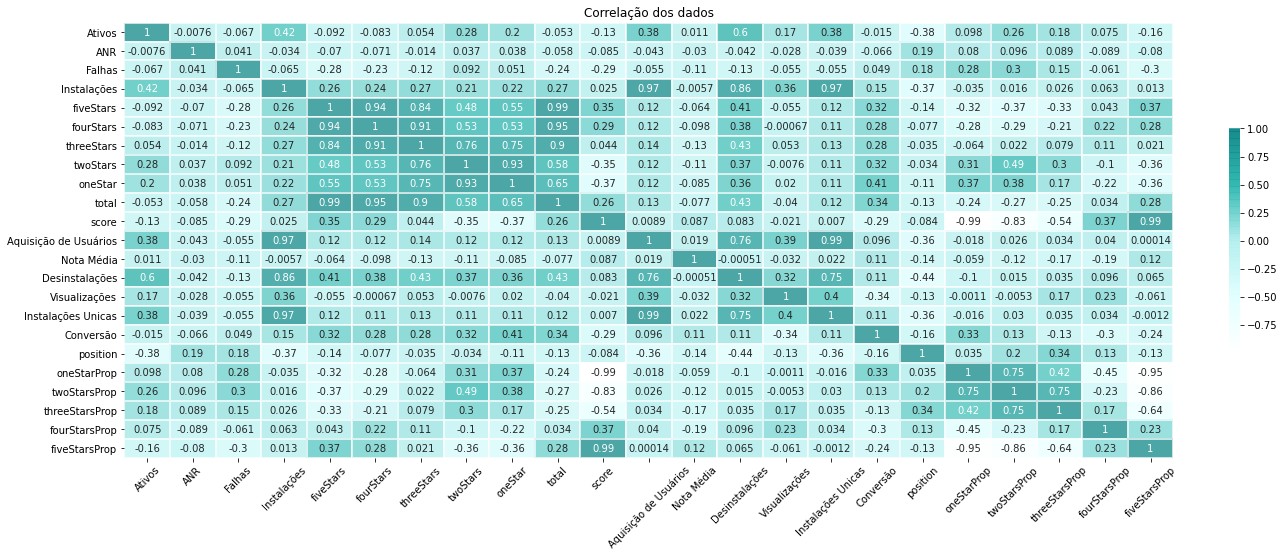

In [ ]:
import numpy as np
import matplotlib.colors
x,y,c = zip(*np.random.rand(30,3)*4-2)
norm=plt.Normalize(-2,2)
aquas = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", 'lightcyan', "paleturquoise", "lightseagreen", "teal"])
correlacoes = aux_df.corr()
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(correlacoes,cmap = aquas,alpha = 0.7, cbar_kws = {"fraction": 0.01}, linewidth=1,ax = ax ,annot = True).set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Correlação dos dados')
plt.show()

In [ ]:
aux_df = aux_df.dropna()

In [ ]:
aux_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2662 entries, 217 to 6722
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data                   2662 non-null   datetime64[ns]
 1   Category               2662 non-null   object        
 2   Ativos                 2662 non-null   int64         
 3   ANR                    2662 non-null   int64         
 4   Falhas                 2662 non-null   int64         
 5   Instalações            2662 non-null   float64       
 6   fiveStars              2662 non-null   int64         
 7   fourStars              2662 non-null   int64         
 8   threeStars             2662 non-null   int64         
 9   twoStars               2662 non-null   int64         
 10  oneStar                2662 non-null   int64         
 11  total                  2662 non-null   int64         
 12  score                  2662 non-null   float64       
 13  p

In [ ]:
teste = aux_df.set_index('Data')['Desinstalações']
media_movel_7d = media_movel(teste, 7)
media_movel_30d= media_movel(teste, 30)
aux_df['DMV30D'] = pd.Series(media_movel_30d)
aux_df['DMV30D'] = aux_df['DMV30D'].fillna(round(aux_df['DMV30D'].mean(),2))
aux_df['DMV7D'] = pd.Series(media_movel_7d)
aux_df['DMV7D'] = aux_df['DMV7D'].fillna(round(aux_df['DMV7D'].mean(),2))
teste = aux_df.set_index('Data')['Instalações']
media_movel_7d = media_movel(teste, 7)
media_movel_30d= media_movel(teste, 30)
aux_df['IMV7D'] = pd.Series(media_movel_7d)
aux_df['IMV7D'] = aux_df['IMV7D'].fillna(aux_df['IMV7D'].mean())
aux_df['IMV30D'] = pd.Series(media_movel_7d)
aux_df['IMV30D'] = aux_df['IMV30D'].fillna(aux_df['IMV30D'].mean())
teste = aux_df.set_index('Data')['Ativos']
media_movel_7d = media_movel(teste, 7)
media_movel_30d = media_movel(teste, 30)
aux_df['AMV7D'] = pd.Series(media_movel_7d)
aux_df['AMV7D'] = aux_df['AMV7D'].fillna(aux_df['AMV7D'].mean())
aux_df['AMV30D'] = pd.Series(media_movel_30d)
aux_df['AMV30D'] = aux_df['AMV30D'].fillna(aux_df['AMV30D'].mean())

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
aux_df = create_dummies(aux_df, "Category")

In [ ]:
aux_df = aux_df.drop(['App','poisition',"Category"],axis = 1)

In [ ]:
aux_df['DMV30D'] = round(aux_df['DMV30D'],2)
aux_df['DMV7D'] = round(aux_df['DMV7D'],2)
aux_df['AMV30D'] =  round(aux_df['AMV30D'],2)
aux_df['AMV7D'] =  round(aux_df['AMV7D'],2)
aux_df['IMV30D'] = round(aux_df['IMV30D'],2)
aux_df['IMV7D'] = round(aux_df['AMV7D'],2)
aux_df

,Data,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,DMV30D,DMV7D,IMV7D,IMV30D,AMV7D,AMV30D,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
217,2020-01-01,68698,8,78,934.0,7178,923,240,40,331,8712,4.67,685,4.89,1447,1566,610,39.0,14,0.037994,0.004591,0.027548,0.105946,0.823921,982.30,625.00,35600.00,752.71,35600.00,68538.43,0,0,0,0,0,0,1
218,2020-01-02,68598,13,161,1623.0,7188,912,250,30,340,8720,4.67,1198,4.32,1577,2492,1129,45.3,13,0.038991,0.003440,0.028670,0.104587,0.824312,1009.30,607.29,35766.29,705.71,35766.29,71695.87,0,0,0,0,0,0,1
219,2020-01-03,68376,11,287,1580.0,7202,914,251,30,341,8738,4.67,1122,4.58,1710,2327,1026,44.1,15,0.039025,0.003433,0.028725,0.104601,0.824216,1021.40,625.00,35901.43,730.57,35901.43,72406.13,0,0,0,0,0,0,1
220,2020-01-04,68147,7,273,1410.0,7174,933,250,30,361,8748,4.66,1045,4.70,1552,2072,949,45.8,16,0.041267,0.003429,0.028578,0.106653,0.820073,1034.13,627.00,36078.14,757.14,36078.14,73113.57,0,0,0,0,0,0,1
221,2020-01-05,68411,7,264,1851.0,7195,935,251,30,362,8773,4.66,1440,4.50,1540,2991,1339,44.8,18,0.041263,0.003420,0.028611,0.106577,0.820130,1052.97,654.71,33315.29,1327.29,33315.29,73816.27,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,2020-10-27,89115,89115,134,1857.0,3251,500,340,430,1510,6031,3.59,871,2.43,1505,2539,844,33.2,167,0.250373,0.071298,0.056375,0.082905,0.539048,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
6719,2020-10-28,89168,89168,153,1346.0,3260,495,346,416,1516,6033,3.59,715,5.00,1158,2451,685,27.9,165,0.251285,0.068954,0.057351,0.082049,0.540361,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
6720,2020-10-29,89075,89075,98,1405.0,3270,491,333,432,1512,6038,3.59,794,2.50,1268,2858,764,26.7,174,0.250414,0.071547,0.055151,0.081318,0.541570,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
6721,2020-10-30,89114,89114,195,1355.0,3256,508,342,430,1506,6042,3.59,762,3.40,1239,2737,729,26.6,169,0.249255,0.071168,0.056604,0.084078,0.538894,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0


In [ ]:
X = aux_df.drop("position",axis = 1)
y = aux_df['position']

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
aux_df = aux_df.set_index('Data')
X = aux_df.drop('position', axis = 1)
y = aux_df['position']

In [ ]:
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.20, random_state = 18)

In [ ]:
regressor = LGBMRegressor() 
regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

Metrics results:
R2 Score: 0.8958956852298883
Squared root of Mean Squared Error (RMSE): 13.433728882703527
Mean squared logarithmic error (RMSLE): 0.14815805220980757
Explained Variance: 0.8959106084562901
Mean Absolute Error (MAE): 9.818400421661037
Median Absolute Error: 5.945639057735903


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass sample_weight=[174.37308124 135.04899177 113.37386931  89.19654445 164.52485853
 119.40836237 129.59882319  88.24499185  40.3249192  123.81178487
 142.46118038  82.25719379  78.26976219 102.67427863  43.47911211
 101.09579732 109.62385258 110.5330048  155.89458002 100.74693327
 104.61409688 132.26816148  31.15042256  97.81136412  97.05657962
  61.60862132 139.50223138 101.06050663 137.31788908  84.85788899
  51.4359648  106.71407376 182.91350822  87.84530102 121.90735882
 101.84705087 134.67899901 132.88365969 108.83894887  30.09804626
 129.24593955 113.51865967 138.91464884 132.61893817 105.33777351
 139.98187059  76.11510053 107.32042386 169.03509818  27.46509485
 122.70048041 111.44752094 167.04655546 146.0104475  137.99969887
  24.19698387  52.20557621 167.95384006 106.09500115 133.15041881
  68.62384919 127.44049722  65.6066621   93.00370297 116.9030887
  95.54304357 111.65879702 186.1080395

In [ ]:
aux_df.to_csv("Appear.csv")

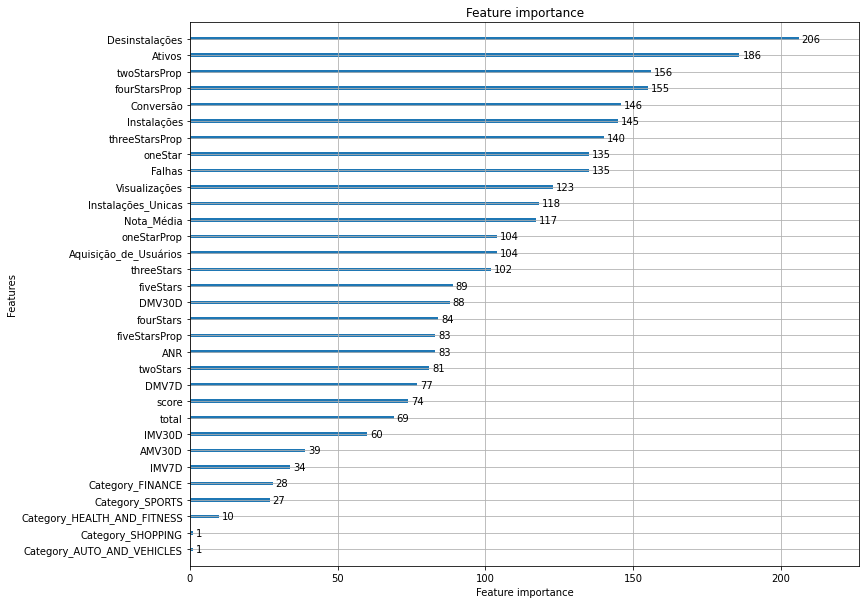

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
lgb.plot_importance(regressor)

In [ ]:
from sklearn.preprocessing import StandardScaler
regressor = LGBMRegressor()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

Metrics results:
R2 Score: 0.866930211286817
Squared root of Mean Squared Error (RMSE): 15.188047541350329
Mean squared logarithmic error (RMSLE): 0.1644484070342671
Explained Variance: 0.8669671066723025
Mean Absolute Error (MAE): 11.609494742760432
Median Absolute Error: 7.213032891970826


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass sample_weight=[173.72777285 138.07170117 113.40317905  89.78195549 159.55248831
 131.11467579 108.36633374  93.03117268  42.71420954 107.39120592
 168.10471283  85.00817279  77.01283633 116.3286934   40.4383645
 102.63565051  99.33900484 106.73894984 155.04815168  99.59801334
 106.2786923  129.91272016  31.82092451  90.29852419 101.85862851
  61.81997697 148.85747153 109.58906955 143.94949437  91.99424491
  46.69664913 108.58991554 188.19341228  93.1791852  107.5826839
 100.83763301 141.32785711 134.60075284 105.73680881  29.97060019
 123.75071236 108.50248765 122.88250881 135.06060157 108.41673337
 126.67017093  90.12825017  93.06482004 163.83238375  27.04594246
 120.78059881 106.18101685 147.58325418 150.22285573 116.77716782
  27.33357788  41.58001925 179.08321974 104.9072809  108.73260571
  65.78696711 107.51210147  64.42340553  99.19616968 109.05646242
  88.26313995  98.85223263 182.10606172

In [ ]:
X

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,DMV30D,DMV7D,IMV7D,IMV30D,AMV7D,AMV30D,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,68698,8,78,934.0,7178,923,240,40,331,8712,4.67,685,4.89,1447,1566,610,39.0,0.037994,0.004591,0.027548,0.105946,0.823921,982.30,625.00,35600.00,752.71,35600.00,68538.43,0,0,0,0,0,0,1
2020-01-02,68598,13,161,1623.0,7188,912,250,30,340,8720,4.67,1198,4.32,1577,2492,1129,45.3,0.038991,0.003440,0.028670,0.104587,0.824312,1009.30,607.29,35766.29,705.71,35766.29,71695.87,0,0,0,0,0,0,1
2020-01-03,68376,11,287,1580.0,7202,914,251,30,341,8738,4.67,1122,4.58,1710,2327,1026,44.1,0.039025,0.003433,0.028725,0.104601,0.824216,1021.40,625.00,35901.43,730.57,35901.43,72406.13,0,0,0,0,0,0,1
2020-01-04,68147,7,273,1410.0,7174,933,250,30,361,8748,4.66,1045,4.70,1552,2072,949,45.8,0.041267,0.003429,0.028578,0.106653,0.820073,1034.13,627.00,36078.14,757.14,36078.14,73113.57,0,0,0,0,0,0,1
2020-01-05,68411,7,264,1851.0,7195,935,251,30,362,8773,4.66,1440,4.50,1540,2991,1339,44.8,0.041263,0.003420,0.028611,0.106577,0.820130,1052.97,654.71,33315.29,1327.29,33315.29,73816.27,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,89115,89115,134,1857.0,3251,500,340,430,1510,6031,3.59,871,2.43,1505,2539,844,33.2,0.250373,0.071298,0.056375,0.082905,0.539048,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
2020-10-28,89168,89168,153,1346.0,3260,495,346,416,1516,6033,3.59,715,5.00,1158,2451,685,27.9,0.251285,0.068954,0.057351,0.082049,0.540361,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
2020-10-29,89075,89075,98,1405.0,3270,491,333,432,1512,6038,3.59,794,2.50,1268,2858,764,26.7,0.250414,0.071547,0.055151,0.081318,0.541570,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0


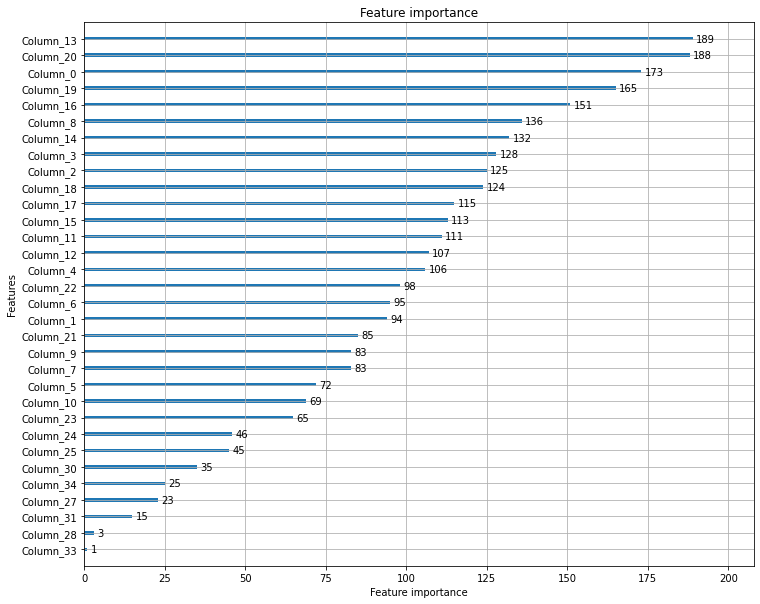

In [ ]:
lgb.plot_importance(regressor)#Desinstalações, fourStarProp, Ativos,Views,Conversão por canal, Views,threeStars,  Falhas, Instalação por canal de aquisição,

In [ ]:
aux_df

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,DMV30D,DMV7D,IMV7D,IMV30D,AMV7D,AMV30D,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,68698,8,78,934.0,7178,923,240,40,331,8712,4.67,685,4.89,1447,1566,610,39.0,14,0.037994,0.004591,0.027548,0.105946,0.823921,982.30,625.00,35600.00,752.71,35600.00,68538.43,0,0,0,0,0,0,1
2020-01-02,68598,13,161,1623.0,7188,912,250,30,340,8720,4.67,1198,4.32,1577,2492,1129,45.3,13,0.038991,0.003440,0.028670,0.104587,0.824312,1009.30,607.29,35766.29,705.71,35766.29,71695.87,0,0,0,0,0,0,1
2020-01-03,68376,11,287,1580.0,7202,914,251,30,341,8738,4.67,1122,4.58,1710,2327,1026,44.1,15,0.039025,0.003433,0.028725,0.104601,0.824216,1021.40,625.00,35901.43,730.57,35901.43,72406.13,0,0,0,0,0,0,1
2020-01-04,68147,7,273,1410.0,7174,933,250,30,361,8748,4.66,1045,4.70,1552,2072,949,45.8,16,0.041267,0.003429,0.028578,0.106653,0.820073,1034.13,627.00,36078.14,757.14,36078.14,73113.57,0,0,0,0,0,0,1
2020-01-05,68411,7,264,1851.0,7195,935,251,30,362,8773,4.66,1440,4.50,1540,2991,1339,44.8,18,0.041263,0.003420,0.028611,0.106577,0.820130,1052.97,654.71,33315.29,1327.29,33315.29,73816.27,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,89115,89115,134,1857.0,3251,500,340,430,1510,6031,3.59,871,2.43,1505,2539,844,33.2,167,0.250373,0.071298,0.056375,0.082905,0.539048,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
2020-10-28,89168,89168,153,1346.0,3260,495,346,416,1516,6033,3.59,715,5.00,1158,2451,685,27.9,165,0.251285,0.068954,0.057351,0.082049,0.540361,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
2020-10-29,89075,89075,98,1405.0,3270,491,333,432,1512,6038,3.59,794,2.50,1268,2858,764,26.7,174,0.250414,0.071547,0.055151,0.081318,0.541570,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0


In [ ]:
aux_df.columns
columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações',
       'Visualizações', 'Instalações Unicas', 'Conversão',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp', 'fourStarsProp',
       'fiveStarsProp', 'DMV30D', 'DMV7D', 'IMV7D', 'IMV30D', 'AMV7D',
       'AMV30D', 'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

Metrics results:
R2 Score: 0.9162239280986325
Squared root of Mean Squared Error (RMSE): 12.63280531202768
Mean squared logarithmic error (RMSLE): 0.16321908695171625
Explained Variance: 0.9171527662870116
Mean Absolute Error (MAE): 9.295177134614745
Median Absolute Error: 4.922500000000014


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass sample_weight=[ 82.58    79.3275  48.7175  70.98   114.8775 172.97   121.7175 103.5775
  32.4475 130.15    73.9575  88.76   168.8825  75.885  164.955   33.99
 115.4375  29.57   108.0775 127.39    67.495   63.0625  47.705   84.755
  70.0675 106.935  168.645  153.9775 123.91    68.78   124.9325 136.05
  58.9275  40.3375 121.905  155.2375 150.7475  34.305   89.8675  30.715
 113.8825 163.0775 121.4475  75.11   111.335  106.305   97.675   86.9075
 115.735   79.0375  83.785  147.3675  84.6275 117.4875  96.9575  23.775
  80.1075  99.5375  84.45   116.6375 111.015   82.8225  84.785   29.41
  95.0925 124.6325 134.32    43.04   117.97   112.265   27.66   113.8725
 111.49   161.41    66.3875  74.41   103.0575 122.18   148.4425 155.555
  95.1825  33.1    105.1325 106.7275  72.44   121.865  125.8275  42.4025
  60.455   65.225  179.55   149.45   126.845   81.2075 105.325   36.8725
  70.77   169.0425 103.0925  

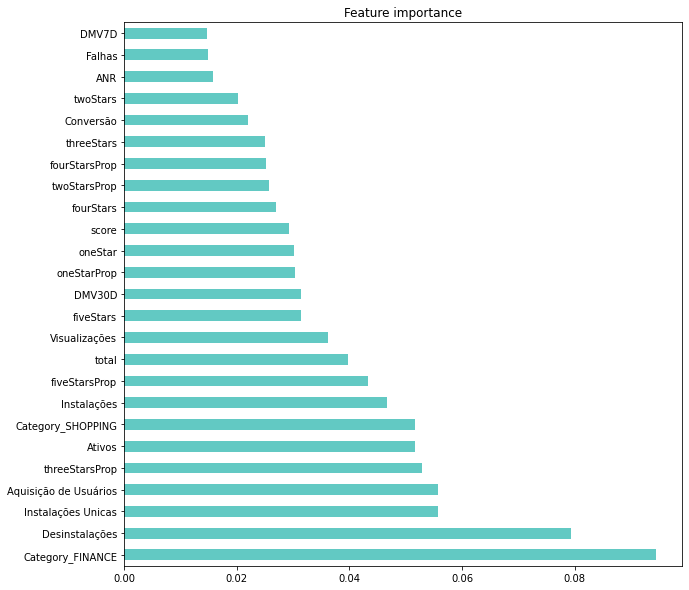

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_squared_log_error, explained_variance_score, mean_absolute_error, median_absolute_error
import joblib
def model_validator(data,test_size, cols, target):
    """
    Returns metrics and feature importances after running Random Forest algorithm
    on a dataset data, following the inputation strategy strategy, with a test size defined.
    cols is a subset of features of data without including the target variable.
    """
    idata = data
    X_i = idata[cols].values
    y_i = y
    X_itrain, X_itest, y_itrain, y_itest = train_test_split(X_i, y_i, test_size=test_size, random_state=142)
    model_i = RandomForestRegModel.fit(X_itrain, y_itrain)
    pred_i = model_i.predict(X_itest)
    feat_importances = pd.Series(model_i.feature_importances_, index = cols)
    feat_importances.nlargest(25).plot(kind = "barh", 
                                       figsize= (10,10), 
                                       color ="lightseagreen",
                                       alpha = 0.7,
                                       title = "Feature importance" )
    print("Metrics results:")
  
    print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
    print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
    print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
    print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
    print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
    print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))
    plt.savefig("best_features_appear.png")
    joblib.dump(model_i,open("model_appear.pkl", 'wb'))
RandomForestRegModel = RandomForestRegressor(bootstrap = False,
 max_depth =  None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators =  400)

model_validator(aux_df,0.20, columns, y)

In [ ]:
RandomForestRegModel = RandomForestRegressor(bootstrap = False,
 max_depth =  None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators =  400)


In [ ]:
import pickle

##validation

In [ ]:
aux_df

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,DMV30D,DMV7D,IMV7D,IMV30D,AMV7D,AMV30D,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,68698,8,78,934.0,7178,923,240,40,331,8712,4.67,685,4.89,1447,1566,610,39.0,14,0.037994,0.004591,0.027548,0.105946,0.823921,982.30,625.00,35600.00,752.71,35600.00,68538.43,0,0,0,0,0,0,1
2020-01-02,68598,13,161,1623.0,7188,912,250,30,340,8720,4.67,1198,4.32,1577,2492,1129,45.3,13,0.038991,0.003440,0.028670,0.104587,0.824312,1009.30,607.29,35766.29,705.71,35766.29,71695.87,0,0,0,0,0,0,1
2020-01-03,68376,11,287,1580.0,7202,914,251,30,341,8738,4.67,1122,4.58,1710,2327,1026,44.1,15,0.039025,0.003433,0.028725,0.104601,0.824216,1021.40,625.00,35901.43,730.57,35901.43,72406.13,0,0,0,0,0,0,1
2020-01-04,68147,7,273,1410.0,7174,933,250,30,361,8748,4.66,1045,4.70,1552,2072,949,45.8,16,0.041267,0.003429,0.028578,0.106653,0.820073,1034.13,627.00,36078.14,757.14,36078.14,73113.57,0,0,0,0,0,0,1
2020-01-05,68411,7,264,1851.0,7195,935,251,30,362,8773,4.66,1440,4.50,1540,2991,1339,44.8,18,0.041263,0.003420,0.028611,0.106577,0.820130,1052.97,654.71,33315.29,1327.29,33315.29,73816.27,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,89115,89115,134,1857.0,3251,500,340,430,1510,6031,3.59,871,2.43,1505,2539,844,33.2,167,0.250373,0.071298,0.056375,0.082905,0.539048,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
2020-10-28,89168,89168,153,1346.0,3260,495,346,416,1516,6033,3.59,715,5.00,1158,2451,685,27.9,165,0.251285,0.068954,0.057351,0.082049,0.540361,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0
2020-10-29,89075,89075,98,1405.0,3270,491,333,432,1512,6038,3.59,794,2.50,1268,2858,764,26.7,174,0.250414,0.071547,0.055151,0.081318,0.541570,1326.02,1246.60,71710.05,1486.90,71710.05,74936.44,0,0,1,0,0,0,0


In [ ]:
validation = pd.read_csv("/content/validation - Página1 (1).csv")

In [ ]:
#validation.drop(["Visibility","Total Reviews","Rate"], axis = 1, inplace = True)
validation['score']  = validation['score'].str.replace(",",".").astype(float)
validation['Nota Média'] = validation['Nota Média'].str.replace(",",".").astype(float)
validation['Desinstalações'] = validation['Desinstalações'].str.replace(",","").astype(int)
validation['Conversão'] = validation['Conversão'].str.replace("%","").astype(float)
validation['Ativos'] = validation['Ativos'].str.replace(",","").astype(int)
validation['Instalações'] = validation['Instalações'].str.replace(",","").astype(int)
validation.rename({"poisition":"position"},axis = 1, inplace = True)

In [ ]:
validation['Aquisição de Usuários'] = validation['Aquisição de Usuários'].str.replace(",","").astype(int)

In [ ]:
validation

,Data,Category,Ativos,ANR,Falhas,Views,Instalações,Visibility,Total Reviews,Rate,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,position,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão
0,2020-07-26,FINANCE,48375,89,96,NaN,725,NaN,NaN,NaN,2377,382,413,392,1390,4954,3.396,189,Corinthians Bmg: Conta digital grátis do Timão,457,3.21,535,1383,432,31.2
1,2020-08-01,FINANCE,151378,5,21,NaN,1554,NaN,NaN,NaN,1309,141,70,30,171,1721,4.386,160,Rede Social e Simulador de Investimentos - Leadr,1218,5.00,1201,3101,1181,38.1


In [ ]:
teste = validation.set_index('Data')['Desinstalações']
teste

Data
2020-07-26     535
2020-08-01    1201
Name: Desinstalações, dtype: int64

In [ ]:
teste = validation.set_index('Data')['Desinstalações']
media_movel_7d = media_movel(teste, 7)
media_movel_30d= media_movel(teste, 30)
validation['DMV30D'] = pd.Series(media_movel_30d)
validation['DMV30D'] = validation['DMV30D'].fillna(round(validation['DMV30D'].mean(),2))
validation['DMV7D'] = pd.Series(media_movel_7d)
validation['DMV7D'] = validation['DMV7D'].fillna(round(validation['DMV7D'].mean(),2))
teste = validation.set_index('Data')['Instalações']
media_movel_7d = media_movel(teste, 7)
media_movel_30d= media_movel(teste, 30)
validation['IMV7D'] = pd.Series(media_movel_7d)
validation['IMV7D'] = validation['IMV7D'].fillna(validation['IMV7D'].mean())
validation['IMV30D'] = pd.Series(media_movel_7d)
validation['IMV30D'] = validation['IMV30D'].fillna(validation['IMV30D'].mean())
teste = validation.set_index('Data')['Ativos']
media_movel_7d = media_movel(teste, 7)
media_movel_30d = media_movel(teste, 30)
validation['AMV7D'] = pd.Series(media_movel_7d)
validation['AMV7D'] = validation['AMV7D'].fillna(validation['AMV7D'].mean())
validation['AMV30D'] = pd.Series(media_movel_30d)
validation['AMV30D'] = validation['AMV30D'].fillna(validation['AMV30D'].mean())

IndexError: ignored

In [ ]:
RandomForestRegModel = RandomForestRegressor(bootstrap = False,
 max_depth =  None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators =  400)

X_train, X_test, y_train, y_test = train_test_split(validation[columns], y, test_size = 0.20, random_state = 101)
RandomForestRegModel.fit(X_train,y_train)
preds = RandomForestRegModel.predict(X_test)
data = {'Observed': y_test,
        'Predicted': preds
        }

result = pd.DataFrame(data, columns = ['Observed', 'Predicted'])
predictions =  pd.DataFrame({'Observed':y_test, 'Predicted': preds })
predictions = predictions.sort_index(ascending= True)
predictions = predictions.groupby(predictions.index).mean()
fig, ax = plt.subplots(figsize = (24,14))    
fig = sns.lineplot(x = predictions.index, y = "Observed", data = predictions, label = 'Observed',
                   ci = None, ax=ax)
fig = sns.lineplot(x = predictions.index, y = "Predicted", data = predictions, label= 'Predicted',
                   ci = None, ax=ax)
plt.title("Observed x Predicted - Appear")
plt.savefig("predicted_observed - appear.png")
plt.show()

#Sem Feature Selection

In [ ]:
columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações', 'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

model_validator(aux_df, 0.30, columns, "position")

In [ ]:
model_validator_scaled(aux_df, 0.30, columns, "position")

# Novo Modelo

In [ ]:
df = pd.read_csv('/content/Dados Appear - Página1 (3).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6724 entries, 0 to 6723
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data                   6724 non-null   object 
 1   Category               6634 non-null   object 
 2   Ativos                 6716 non-null   object 
 3   ANR                    6715 non-null   object 
 4   Falhas                 6715 non-null   object 
 5   Views                  0 non-null      float64
 6   Instalações            6716 non-null   object 
 7   Visibility             35 non-null     object 
 8   Total Reviews          5 non-null      float64
 9   Rate                   5 non-null      object 
 10  fiveStars              5104 non-null   float64
 11  fourStars              5104 non-null   float64
 12  threeStars             5104 non-null   float64
 13  twoStars               5104 non-null   float64
 14  oneStar                5104 non-null   float64
 15  tota

In [ ]:
df

,Data,Category,Ativos,ANR,Falhas,Views,Instalações,Visibility,Total Reviews,Rate,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão
0,2020-01-01,SHOPPING,3135,-,4,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,16,-,28,73.0,15.0,20.5%
1,2020-01-02,SHOPPING,3130,-,2,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,29,-,33,121.0,20.0,16.5%
2,2020-01-03,SHOPPING,3131,-,-,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,31,5,35,122.0,22.0,18.0%
3,2020-01-04,SHOPPING,3129,1,1,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,31,-,35,124.0,20.0,16.1%
4,2020-01-05,SHOPPING,3133,-,-,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,38,-,33,60.0,16.0,26.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,28/10/2020,FINANCE,89168,89168,153,NaN,1346,NaN,NaN,NaN,3260.0,495.0,346.0,416.0,1516.0,6033.0,"3,591",165,Woop Sicredi: conta digital com poupança,715,5,1158,2451.0,685.0,27.9%
6720,29/10/2020,FINANCE,89075,89075,98,NaN,1405,NaN,NaN,NaN,3270.0,491.0,333.0,432.0,1512.0,6038.0,"3,592",174,Woop Sicredi: conta digital com poupança,794,"2,5",1268,2858.0,764.0,26.7%
6721,30/10/2020,FINANCE,89114,89114,195,NaN,1355,NaN,NaN,NaN,3256.0,508.0,342.0,430.0,1506.0,6042.0,"3,592",169,Woop Sicredi: conta digital com poupança,762,"3,4",1239,2737.0,729.0,26.6%
6722,31/10/2020,FINANCE,89072,89072,96,NaN,1083,NaN,NaN,NaN,3257.0,519.0,349.0,429.0,1489.0,6043.0,"3,6",168,Woop Sicredi: conta digital com poupança,595,"4,5",1015,0.0,0.0,0.0%


In [ ]:
def fix_dataframe(df):
  total = df['
  total']
  df['Ativos'] = df['Ativos'].replace("-",np.nan).str.replace(',','').astype(float)
  df['ANR'] = df['ANR'].replace('-',np.nan).astype(float)
  df['Falhas'] = df['Falhas'].str.replace(".",'').str.replace(",",'').replace("-",np.nan).astype(float)
  df['Instalações'] = df['Instalações'].replace("-",np.nan).str.replace(".","").str.replace(",","").astype(float)
  df['Aquisição de Usuários'] = df['Aquisição de Usuários'].replace('-',np.nan).str.replace(".","").str.replace(",","").astype(float)
  df['Nota Média'] = df['Nota Média'].str.replace(",",".").replace("-",np.nan).astype(float)
  df['Desinstalações'] = df['Desinstalações'].replace("-",np.nan).str.replace(".","").str.replace(",","").astype(float)
  df['Conversão'] = df['Conversão'].str.replace("%","").astype(float)
  df['position'] = df['poisition'].replace("200+",np.nan).astype(float)
  df['Data'] = pd.to_datetime(df['Data'])
  df['score'] = df['score'].str.replace(',','.').astype(float)
  df['oneStarProp'] = df['oneStar'] / df['total']
  df['twoStarsProp'] = df['twoStars'] / total
  df['threeStarsProp'] = df['threeStars'] / total
  df['fourStarsProp'] = df['fourStars'] / total
  df['fiveStarsProp'] = df['fiveStars'] / total
  
  return df

fix_dataframe(df)

In [ ]:
def check_nulls(data):
   """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them
   """

   nulls = data.isna().sum()
   nulls = nulls[nulls > 0] / len(data) * 100
   nulls = pd.DataFrame(nulls.sort_values(ascending = False))
   nulls = nulls.reset_index().rename(columns = ({'index': 'Feature', 0: "Null Rows %"}))
   return nulls

check_nulls(df)

,Feature,Null Rows %
0,Views,100.000000
1,Total Reviews,99.925640
2,Rate,99.925640
3,Visibility,99.479477
4,score,24.167162
5,total,24.167162
6,threeStars,24.092802
7,fiveStars,24.092802
8,fourStars,24.092802
9,oneStar,24.092802


In [ ]:
df = df.drop(["Desinstalações","Visibility",'Views','Total Reviews','Rate'],axis = 1)

In [ ]:
df

,Data,Category,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Visualizações,Instalações Unicas,Conversão
0,2020-01-01,SHOPPING,3135,-,4,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,16,-,73.0,15.0,20.5%
1,2020-01-02,SHOPPING,3130,-,2,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,29,-,121.0,20.0,16.5%
2,2020-01-03,SHOPPING,3131,-,-,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,31,5,122.0,22.0,18.0%
3,2020-01-04,SHOPPING,3129,1,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,31,-,124.0,20.0,16.1%
4,2020-01-05,SHOPPING,3133,-,-,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200+,3CASH,38,-,60.0,16.0,26.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,28/10/2020,FINANCE,89168,89168,153,1346,3260.0,495.0,346.0,416.0,1516.0,6033.0,"3,591",165,Woop Sicredi: conta digital com poupança,715,5,2451.0,685.0,27.9%
6720,29/10/2020,FINANCE,89075,89075,98,1405,3270.0,491.0,333.0,432.0,1512.0,6038.0,"3,592",174,Woop Sicredi: conta digital com poupança,794,"2,5",2858.0,764.0,26.7%
6721,30/10/2020,FINANCE,89114,89114,195,1355,3256.0,508.0,342.0,430.0,1506.0,6042.0,"3,592",169,Woop Sicredi: conta digital com poupança,762,"3,4",2737.0,729.0,26.6%
6722,31/10/2020,FINANCE,89072,89072,96,1083,3257.0,519.0,349.0,429.0,1489.0,6043.0,"3,6",168,Woop Sicredi: conta digital com poupança,595,"4,5",0.0,0.0,0.0%


##Com imputação de dados

In [ ]:
apps = df['App'].unique()
_df = pd.DataFrame({})
for app in apps:
  aux_df = df[df['App'] == app].fillna(df[df['App'] == app].median())
  _df = pd.concat([_df,aux_df])

In [ ]:
_df

In [ ]:
_df.isnull().sum()

Data                        0
Category                   90
Ativos                      8
ANR                         9
Falhas                      9
Instalações                 8
fiveStars                   0
fourStars                   0
threeStars                  0
twoStars                    0
oneStar                     0
total                       0
score                    1622
poisition                 107
App                         0
Aquisição de Usuários       8
Nota Média                100
Visualizações               0
Instalações Unicas          0
Conversão                 198
dtype: int64

In [ ]:
_df['ANR'] =_df['ANR'].astype(int)
_df['Falhas'] = _df['Falhas'].astype(int)
_df['fiveStars'] = _df['fiveStars'].astype(int)
_df['fourStars'] = _df['fourStars'].astype(int)
_df['threeStars'] = _df['threeStars'].astype(int)
_df['twoStars'] = _df['twoStars'].astype(int)
_df['oneStar'] = _df['oneStar'].astype(int)
_df['total'] = _df['total'].astype(int)
_df['score'] = _df['score']
_df['Aquisição de Usuários'] = _df['Aquisição de Usuários'].astype(int)
#_df['Desinstalações'] = _df['Desinstalações'].astype(int)
_df['Visualizações'] = _df['Visualizações'].astype(int)
_df['Instalações Unicas'] = _df['Instalações Unicas'].astype(int)
total = _df['total']
_df['oneStarProp'] = _df['oneStar'] / total
_df['twoStarsProp'] =_df['twoStars'] / total
_df['threeStarsProp'] = _df['threeStars'] / total
_df['fourStarsProp'] = _df['fourStars'] / total
_df['fiveStarsProp'] = _df['fiveStars'] / total

ValueError: ignored

In [ ]:
_df

,Data,Category,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Visualizações,Instalações Unicas,Conversão,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
203,2020-07-22,SHOPPING,8597,-,4,290,139.0,9.0,9.0,5.0,24.0,186.0,"4,24",200+,3CASH,262,5,836.0,252.0,30.1%,0,0,0,0,0,1,0
204,2020-07-23,SHOPPING,8701,1,76,273,145.0,7.0,7.0,5.0,27.0,191.0,"4,23",200+,3CASH,236,5,736.0,230.0,31.3%,0,0,0,0,0,1,0
205,2020-07-24,SHOPPING,8778,1,6,278,150.0,5.0,7.0,3.0,27.0,192.0,"4,27",200+,3CASH,246,-,744.0,240.0,32.3%,0,0,0,0,0,1,0
206,2020-07-25,SHOPPING,8796,3,7,160,152.0,5.0,7.0,1.0,27.0,192.0,"4,3",200+,3CASH,130,-,494.0,123.0,24.9%,0,0,0,0,0,1,0
207,2020-07-26,SHOPPING,8845,-,4,160,152.0,5.0,7.0,1.0,27.0,192.0,"4,3",200+,3CASH,133,-,485.0,122.0,25.2%,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,28/10/2020,SHOPPING,199022,13,573,1749,1304.0,388.0,666.0,1045.0,6380.0,9783.0,"1,895",72,Época Cosméticos: Comprar Perfumes e Maquiagem,1235,"2,11",2158.0,1219.0,56.5%,0,0,0,0,0,1,0
5997,29/10/2020,SHOPPING,199068,20,427,1587,1296.0,395.0,663.0,1049.0,6384.0,9787.0,"1,894",73,Época Cosméticos: Comprar Perfumes e Maquiagem,1263,"1,7",2224.0,1248.0,56.1%,0,0,0,0,0,1,0
5998,30/10/2020,SHOPPING,198988,7,784,1561,1273.0,397.0,666.0,1054.0,6407.0,9797.0,"1,885",72,Época Cosméticos: Comprar Perfumes e Maquiagem,1210,"1,2",2280.0,1174.0,51.5%,0,0,0,0,0,1,0
5999,31/10/2020,SHOPPING,199195,10,802,1494,1270.0,396.0,664.0,1071.0,6399.0,9800.0,"1,885",70,Época Cosméticos: Comprar Perfumes e Maquiagem,1173,"2,2",0.0,0.0,0.0%,0,0,0,0,0,1,0


In [ ]:
_df['Ativos'] = _df['Ativos'].astype(int)
_df['Instalações'] = _df['Instalações'].astype(int)
_df['oneStarProp'] = round(_df['oneStarProp'],2)
_df['twoStarsProp'] = round(_df['twoStarsProp'],2)
_df['threeStarsProp'] = round(_df['threeStarsProp'],2)
_df['fourStarsProp'] = round(_df['fourStarsProp'],2)
_df['fiveStarsProp'] = round(_df['fiveStarsProp'],2)


ValueError: ignored

In [ ]:
_df = _df.dropna()

In [ ]:
_df = create_dummies(_df,'Category')
_df.columns

Index(['Data', 'Category', 'Ativos', 'ANR', 'Falhas', 'Instalações',
       'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 'total',
       'score', 'poisition', 'App', 'Aquisição de Usuários', 'Nota Média',
       'Visualizações', 'Instalações Unicas', 'Conversão',
       'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS', 'Category_FINANCE',
       'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS'],
      dtype='object')

In [ ]:
_df

In [ ]:
_df[columns]

In [ ]:
_df

In [ ]:
_df = _df.dropna()

In [ ]:
_df

In [ ]:

columns = ['Ativos', 'ANR', 'Falhas', 'Instalações',
       'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 'total',
       'score', 'Aquisição de Usuários', 'Nota Média',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp',
       'fourStarsProp', 'fiveStarsProp', 'Category_AUTO_AND_VEHICLES',
       'Category_BUSINESS', 'Category_FINANCE', 'Category_HEALTH_AND_FITNESS',
       'Category_LIFESTYLE', 'Category_SHOPPING', 'Category_SPORTS']

In [ ]:
X = _df.drop(['position'],axis = 1)
y = _df['position']
X = X[columns]
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predicted = rfr.predict(X_test)

In [ ]:
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_test, predicted)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_test, predicted))))
print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_test, predicted))))
print("Explained Variance: {}".format(explained_variance_score(y_test, predicted)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, predicted)))
print("Median Absolute Error: {}".format(median_absolute_error(y_test, predicted)))

In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate":[0.1, 0.5, 0.7],
    'n_estimators': [300, 700, 1000],
    'colsample_bytree': [0.1, 0.3],
    'max_depth': [3,5,15],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [0.01, 0.1,0.3],
    'reg_lambda': [0.01, 0.1,0.3],
    'min_split_gain': [0.1, 0.3,0.5],
    'subsample': [0.1, 0.3, 0.5],
    'subsample_freq': [20,40]
}

lgb_model = LGBMRegressor()
xgb_grid = GridSearchCV(lgb_model,
                        param_grid,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import RobustScaler
regressor = lgb.LGBMRegressor(colsample_bytree =  0.3, learning_rate =  0.1, 
                              max_depth = 15, min_split_gain = 0.1, n_estimators = 500, num_leaves = 50, reg_alpha = 0.3,
                             reg_lambda = 0.1, subsample = 0.5, subsample_freq = 40)
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.20, random_state = 14)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
#print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))


In [ ]:
joblib.dump(regressor,open("model_appear.pkl", 'wb'))

In [ ]:
lgb.plot_importance(regressor)

In [ ]:
regressor.predict(scaler.transform(_validation))

In [ ]:
validation['position']

In [ ]:
_validation = _validation.set_index("Data")
_validation.drop(['Views','position'],axis =1, inplace = True)

In [ ]:
_validation = validation.drop(['Category','Visibility','Total Reviews','Rate','App','Desinstalações','Visualizações','Instalações Unicas','Conversão'],axis = 1)

In [ ]:
validation['oneStarProp'] = round((validation['oneStar']/validation['total']),2)
validation['twoStarsProp'] = round((validation['twoStars']/validation['total']),2)
validation['threeStarsProp'] = round((validation['threeStars'] / validation['total']),2)
validation['fourStarsProp'] = round((validation['fourStars'] / validation['total']),2)
validation['fiveStarsProp'] = round((validation['fiveStars'] / validation['total']),2)

In [ ]:
validation['oneStarProp'] = round(validation['oneStarProp'],2)
validation['twoStarsProp'] = round(validation['twoStarsProp'],2)
validation['threeStarsProp'] = round(validation['threeStarsProp'],2)
validation['fourStarsProp'] = round(validation['fourStarsProp'],2)
validation['fiveStarsProp'] = round(validation['fiveStarsProp'],2)

In [ ]:
_validation = validation[columns]

In [ ]:
_validation

In [ ]:
validation

In [ ]:
141 - 160

In [ ]:
regressor.predict(_validation)

In [ ]:
columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações',
        'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

model = model_validator_1(_df, 0.25, columns, "position")

In [ ]:
aux_df = df.dropna()

In [ ]:
aux_df

In [ ]:
aux_df['ANR'] = aux_df['ANR'].astype(int)
aux_df['Falhas'] = aux_df['Falhas'].astype(int)
aux_df['fiveStars'] = aux_df['fiveStars'].astype(int)
aux_df['fourStars'] = aux_df['fourStars'].astype(int)
aux_df['threeStars'] = aux_df['threeStars'].astype(int)
aux_df['twoStars'] = aux_df['twoStars'].astype(int)
aux_df['oneStar'] = aux_df['oneStar'].astype(int)
aux_df['total'] = aux_df['total'].astype(int)
aux_df['score'] = round(aux_df['score'],2)
aux_df['Aquisição de Usuários'] = aux_df['Aquisição de Usuários'].astype(int)
aux_df['Desinstalações'] = aux_df['Desinstalações'].astype(int)
aux_df['Visualizações'] = aux_df['Visualizações'].astype(int)
aux_df['Instalações Unicas'] = aux_df['Instalações Unicas'].astype(int)
aux_df['position'] = aux_df['position'].astype(int)
total = aux_df['total']
aux_df['oneStarProp'] = aux_df['oneStar'] / total
aux_df['twoStarsProp'] = aux_df['twoStars'] / total
aux_df['threeStarsProp'] = aux_df['threeStars'] / total
aux_df['fourStarsProp'] = aux_df['fourStars'] / total
aux_df['fiveStarsProp'] = aux_df['fiveStars'] / total

In [ ]:
aux_df

In [ ]:
aux_df['Ativos'] = aux_df['Ativos'].astype(int)
aux_df['Instalações'] = aux_df['Instalações'].astype(int)
aux_df['oneStarProp'] = round(aux_df['oneStarProp'],2)
aux_df['twoStarsProp'] = round(aux_df['twoStarsProp'],2)
aux_df['threeStarsProp'] = round(aux_df['threeStarsProp'],2)
aux_df['fourStarsProp'] = round(aux_df['fourStarsProp'],2)
aux_df['fiveStarsProp'] = round(aux_df['fiveStarsProp'],2)


In [ ]:
aux_df

In [ ]:
aux_df = aux_df.drop("App",axis = 1)

In [ ]:
aux_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_squared_log_error, explained_variance_score, mean_absolute_error, median_absolute_error
import joblib
def model_validator_1(data,test_size, cols, target):
    """
    Returns metrics and feature importances after running Random Forest algorithm
    on a dataset data, following the inputation strategy strategy, with a test size defined.
    cols is a subset of features of data without including the target variable.
    """
    idata = data
    X_i = idata[cols].values
    y_i = y
    X_itrain, X_itest, y_itrain, y_itest = train_test_split(X_i, y_i, test_size=test_size, random_state=142)
    model_i = RandomForestRegModel.fit(X_itrain, y_itrain)
    pred_i = model_i.predict(X_itest)
    feat_importances = pd.Series(model_i.feature_importances_, index = cols)
    feat_importances.nlargest(25).plot(kind = "barh", 
                                       figsize= (10,10), 
                                       color ="lightseagreen",
                                       alpha = 0.7,
                                       title = "Feature importance" )
    print("Metrics results:")
  
    print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
    print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
    print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
    print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
    print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
    print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))
    plt.savefig("best_features_appear.png")
    return model_i


In [ ]:
aux_df = create_dummies(aux_df,'Category').drop("Category",axis = 1)
aux_df

In [ ]:
columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

model_validator_1(_df, 0.25, columns, "position")

In [ ]:
aux_df.columns

In [ ]:
aux_df = aux_df.set_index("Data")

In [ ]:
columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars',
       'fourStars', 'threeStars', 'twoStars', 'oneStar', 'total', 'score',
        'Aquisição de Usuários', 'Nota Média', 'Desinstalações',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp', 'fourStarsProp',
       'fiveStarsProp', 'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

model_1 = model_validator_1(aux_df, 0.20, columns, "position")

In [ ]:
from sklearn.preprocessing import Normalizer
def model_validator_scaler(data,test_size, cols, target):
    """
    Returns metrics and feature importances after running Random Forest algorithm
    on a dataset data, following the inputation strategy strategy, with a test size defined.
    cols is a subset of features of data without including the target variable.
    """
    idata = data
    X_i = idata[cols].values
    y_i = y
    X_itrain, X_itest, y_itrain, y_itest = train_test_split(X_i, y_i, test_size=test_size, random_state=142)
    model_i = RandomForestRegModel.fit(X_itrain, y_itrain)
    pred_i = model_i.predict(X_itest)
    feat_importances = pd.Series(model_i.feature_importances_, index = cols)
    feat_importances.nlargest(25).plot(kind = "barh", 
                                       figsize= (10,10), 
                                       color ="lightseagreen",
                                       alpha = 0.7,
                                       title = "Feature importance" )
    print("Metrics results:")
  
    print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
    print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
    print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
    print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
    print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
    print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))
    return model_i
#model_scaled = model_validator_scaler(aux_df, 0.20, columns, "position")

In [ ]:
aux_df

In [ ]:
columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações',
       'Visualizações', 'Instalações Unicas', 'Conversão', 'position',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp', 'fourStarsProp',
       'fiveStarsProp','Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

In [ ]:
_t = aux_df[['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações',
       'Visualizações', 'Instalações Unicas', 'Conversão', 'position',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp', 'fourStarsProp',
       'fiveStarsProp','Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']]

In [ ]:
y = _t['position']
X = _t.drop("position",axis = 1)

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

In [ ]:
import autosklearn

In [ ]:
X

In [ ]:
from autosklearn.regression import AutoSklearnRegressor
model = AutoSklearnRegressor(time_left_for_this_task=1800, per_run_time_limit=420, n_jobs=-1, initial_configurations_via_metalearning = 50,
                             )
# perform the search
model.fit(X_train, y_train)

In [ ]:
model.cv_results_

In [ ]:
print(model.sprint_statistics())

In [ ]:
X_test

In [ ]:
pred_i = model.predict(X_test)
#mae = mean_absolute_error(y_itest, y_hat)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
#print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

In [ ]:
print(model.show_models())

In [ ]:
validation = pd.read_csv("/content/validation - Página1 (1).csv")
validation

,Data,Category,Ativos,ANR,Falhas,Views,Instalações,Visibility,Total Reviews,Rate,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão
0,2020-07-26,FINANCE,48375,89,96,NaN,725,NaN,NaN,NaN,2377,382,413,392,1390,4954,"3,396",189,Corinthians Bmg: Conta digital grátis do Timão,457,"3,21",535,1383,432,31.2%
1,2020-08-01,FINANCE,"151,378",5,21,NaN,"1,554",NaN,NaN,NaN,1309,141,70,30,171,1721,"4,386",160,Rede Social e Simulador de Investimentos - Leadr,"1,218",5.00,"1,201",3101,1181,38.1%


In [ ]:
_t.columns

In [ ]:
validation

,Data,Category,Ativos,ANR,Falhas,Views,Instalações,Visibility,Total Reviews,Rate,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão
0,2020-07-26,FINANCE,48375,89,96,NaN,725,NaN,NaN,NaN,2377,382,413,392,1390,4954,"3,396",189,Corinthians Bmg: Conta digital grátis do Timão,457,"3,21",535,1383,432,31.2%
1,2020-08-01,FINANCE,"151,378",5,21,NaN,"1,554",NaN,NaN,NaN,1309,141,70,30,171,1721,"4,386",160,Rede Social e Simulador de Investimentos - Leadr,"1,218",5.00,"1,201",3101,1181,38.1%


In [ ]:
_validation.columns

In [ ]:
t = _validation 

NameError: ignored

In [ ]:
_columns = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações','Category_AUTO_AND_VEHICLES', 'Category_BUSINESS', 'Category_FINANCE',
       'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS', 'oneStarProp',
       'twoStarsProp', 'threeStarsProp', 'fourStarsProp', 'fiveStarsProp',]

In [ ]:
regressor.predict(_validation[_columns])

In [ ]:
_t = scaler.fit_transform(_validation)

In [ ]:
validation['poisition']

In [ ]:
scaler = Normalizer()
model_scaled.predict(_t)

In [ ]:
total = validation['total']
validation['oneStarProp'] = validation['oneStar'] / total
validation['twoStarsProp'] = validation['twoStars'] / total
validation['threeStarsProp'] = validation['threeStars'] / total
validation['fourStarsProp'] = validation['fourStars'] / total
validation['fiveStarsProp'] =validation['fiveStars'] / total

In [ ]:
validation['Category_AUTO_AND_VEHICLES'] = 0
validation['Category_BUSINESS'] = 0
validation['Category_FINANCE'] = 1	
validation['Category_HEALTH_AND_FITNESS'] = 0
validation['Category_LIFESTYLE'] = 0	
validation['Category_SHOPPING'] = 0
validation['Category_SPORTS'] = 0

In [ ]:

_validation = validation[['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'Desinstalações',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp', 'fourStarsProp',
       'fiveStarsProp', 'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']]
_validation['Aquisição de Usuários'] = _validation['Aquisição de Usuários'].str.replace(",","").astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
_validation['Instalações'] = _validation['Instalações'].str.replace(",","").astype("int")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
_validation['Ativos'] = _validation['Ativos'].str.replace(",","").astype(int)
_validation['score'] = _validation['score'].str.replace(",","").astype(int)
_validation['Nota Média'] = _validation['Nota Média'].str.replace(",",".").astype(float)
_validation['Desinstalações'] = _validation['Desinstalações'].str.replace(',',"").astype(float)
_validation['Instalações'] = _validiation['Instalações'].str.replace(",","").astype("int")

AttributeError: ignored

In [ ]:
validation['poisition']

In [ ]:
160 - 129.145

In [ ]:
model_1.predict(_validation)

In [ ]:
model.p

In [ ]:
model.predict(_validation.values)

#Refazendo o modelo

In [ ]:
df = pd.read_csv("/content/Dados Appear - Página1 (3).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6724 entries, 0 to 6723
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data                   6724 non-null   object 
 1   Category               6634 non-null   object 
 2   Ativos                 6716 non-null   object 
 3   ANR                    6715 non-null   object 
 4   Falhas                 6715 non-null   object 
 5   Views                  0 non-null      float64
 6   Instalações            6716 non-null   object 
 7   Visibility             35 non-null     object 
 8   Total Reviews          5 non-null      float64
 9   Rate                   5 non-null      object 
 10  fiveStars              5104 non-null   float64
 11  fourStars              5104 non-null   float64
 12  threeStars             5104 non-null   float64
 13  twoStars               5104 non-null   float64
 14  oneStar                5104 non-null   float64
 15  tota

In [ ]:
df = fix_dataframe(df)

In [ ]:
df['position'] = df['position'].replace(np.nan,200)

In [ ]:
df['Category']= df['Category'].fillna("FINANCE")

In [ ]:
df.isnull().sum()
apps = df['App'].unique()
_df = pd.DataFrame({})
for app in apps:
  mediana = df[df['App'] == app].median()
  aux_df = df[df['App']==app].fillna(mediana)
  _df = pd.concat([_df,aux_df])

_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Data,Category,Ativos,ANR,Falhas,Views,Instalações,Visibility,Total Reviews,Rate,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,App,Aquisição de Usuários,Nota Média,Desinstalações,Visualizações,Instalações Unicas,Conversão,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp
0,2020-01-01,SHOPPING,3135.0,3.0,4.0,NaN,22.0,NaN,176.0,NaN,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,3CASH,16.0,5.00,28.0,73.0,15.0,20.5,200.0,0.139175,0.009852,0.059113,0.037815,0.756929
1,2020-01-02,SHOPPING,3130.0,3.0,2.0,NaN,40.0,NaN,176.0,NaN,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,3CASH,29.0,5.00,33.0,121.0,20.0,16.5,200.0,0.139175,0.009852,0.059113,0.037815,0.756929
2,2020-01-03,SHOPPING,3131.0,3.0,4.0,NaN,36.0,NaN,176.0,NaN,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,3CASH,31.0,5.00,35.0,122.0,22.0,18.0,200.0,0.139175,0.009852,0.059113,0.037815,0.756929
3,2020-01-04,SHOPPING,3129.0,1.0,1.0,NaN,40.0,NaN,176.0,NaN,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,3CASH,31.0,5.00,35.0,124.0,20.0,16.1,200.0,0.139175,0.009852,0.059113,0.037815,0.756929
4,2020-01-05,SHOPPING,3133.0,3.0,4.0,NaN,41.0,NaN,176.0,NaN,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,3CASH,38.0,5.00,33.0,60.0,16.0,26.7,200.0,0.139175,0.009852,0.059113,0.037815,0.756929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,2020-10-28,SHOPPING,199022.0,13.0,573.0,NaN,1749.0,NaN,NaN,NaN,1304.0,388.0,666.0,1045.0,6380.0,9783.0,1.895,72,Época Cosméticos: Comprar Perfumes e Maquiagem,1235.0,2.11,1733.0,2158.0,1219.0,56.5,72.0,0.652152,0.106818,0.068077,0.039661,0.133292
5997,2020-10-29,SHOPPING,199068.0,20.0,427.0,NaN,1587.0,NaN,NaN,NaN,1296.0,395.0,663.0,1049.0,6384.0,9787.0,1.894,73,Época Cosméticos: Comprar Perfumes e Maquiagem,1263.0,1.70,1585.0,2224.0,1248.0,56.1,73.0,0.652294,0.107183,0.067743,0.040360,0.132421
5998,2020-10-30,SHOPPING,198988.0,7.0,784.0,NaN,1561.0,NaN,NaN,NaN,1273.0,397.0,666.0,1054.0,6407.0,9797.0,1.885,72,Época Cosméticos: Comprar Perfumes e Maquiagem,1210.0,1.20,1564.0,2280.0,1174.0,51.5,72.0,0.653976,0.107584,0.067980,0.040523,0.129938
5999,2020-10-31,SHOPPING,199195.0,10.0,802.0,NaN,1494.0,NaN,NaN,NaN,1270.0,396.0,664.0,1071.0,6399.0,9800.0,1.885,70,Época Cosméticos: Comprar Perfumes e Maquiagem,1173.0,2.20,1371.0,0.0,0.0,0.0,70.0,0.652959,0.109286,0.067755,0.040408,0.129592


In [ ]:
_df['oneStarProp'] = round(_df['oneStarProp'],2)
_df['twoStarsProp'] = round(_df['twoStarsProp'],2)
_df['threeStarsProp'] = round(_df['threeStarsProp'],2)
_df['fourStarsProp'] = round(_df['fourStarsProp'],2)
_df['fiveStarsProp'] = round(_df['fiveStarsProp'],2)

In [ ]:
_df = create_dummies(_df,'Category')

In [ ]:
_df = _df.drop(['Category','Views','Visibility','Total Reviews', 'Rate','App','Desinstalações',	'Visualizações','Instalações Unicas','Conversão'],axis =1)

In [ ]:
_df

,Data,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,poisition,Aquisição de Usuários,Nota Média,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
0,2020-01-01,3135.0,3.0,4.0,22.0,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,16.0,5.00,200.0,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
1,2020-01-02,3130.0,3.0,2.0,40.0,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,29.0,5.00,200.0,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
2,2020-01-03,3131.0,3.0,4.0,36.0,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,31.0,5.00,200.0,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
3,2020-01-04,3129.0,1.0,1.0,40.0,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,31.0,5.00,200.0,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
4,2020-01-05,3133.0,3.0,4.0,41.0,170.0,9.0,11.0,2.0,28.0,228.0,4.260,200+,38.0,5.00,200.0,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,2020-10-28,199022.0,13.0,573.0,1749.0,1304.0,388.0,666.0,1045.0,6380.0,9783.0,1.895,72,1235.0,2.11,72.0,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0
5997,2020-10-29,199068.0,20.0,427.0,1587.0,1296.0,395.0,663.0,1049.0,6384.0,9787.0,1.894,73,1263.0,1.70,73.0,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0
5998,2020-10-30,198988.0,7.0,784.0,1561.0,1273.0,397.0,666.0,1054.0,6407.0,9797.0,1.885,72,1210.0,1.20,72.0,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0
5999,2020-10-31,199195.0,10.0,802.0,1494.0,1270.0,396.0,664.0,1071.0,6399.0,9800.0,1.885,70,1173.0,2.20,70.0,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0


In [ ]:
_df['Ativos'] = _df['Ativos'].astype(int)
_df['ANR'] = _df['ANR'].astype(int)
_df['Falhas'] = _df['Falhas'].astype(int)
_df['Instalações'] = _df['Instalações'].astype(int)
_df['fiveStars'] = _df['fiveStars'].astype(int)
_df['fourStars'] = _df['fourStars'].astype(int)
_df['threeStars'] = _df['threeStars'].astype(int)
_df['twoStars'] = _df['twoStars'].astype(int)
_df['oneStar'] = _df['oneStar'].astype(int)
_df['position'] = _df['position'].fillna(200)
_df['position'] = _df['position'].astype(int)
_df['Aquisição de Usuários'] = _df['Aquisição de Usuários'].astype(int)

In [ ]:
_df['total'] = _df['total'].astype(int)

In [ ]:
_df.columns
cols = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars',
       'fourStars', 'threeStars', 'twoStars', 'oneStar', 'total', 'score',
        'Aquisição de Usuários', 'Nota Média', 'position',
       'oneStarProp', 'twoStarsProp', 'threeStarsProp', 'fourStarsProp',
       'fiveStarsProp', 'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS',
       'Category_FINANCE', 'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']

In [ ]:
aux_df = _df[cols]
aux_df

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,position,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
0,3135,3,4,22,170,9,11,2,28,228,4.260,16,5.00,200,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
1,3130,3,2,40,170,9,11,2,28,228,4.260,29,5.00,200,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
2,3131,3,4,36,170,9,11,2,28,228,4.260,31,5.00,200,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
3,3129,1,1,40,170,9,11,2,28,228,4.260,31,5.00,200,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
4,3133,3,4,41,170,9,11,2,28,228,4.260,38,5.00,200,0.14,0.01,0.06,0.04,0.76,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,199022,13,573,1749,1304,388,666,1045,6380,9783,1.895,1235,2.11,72,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0
5997,199068,20,427,1587,1296,395,663,1049,6384,9787,1.894,1263,1.70,73,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0
5998,198988,7,784,1561,1273,397,666,1054,6407,9797,1.885,1210,1.20,72,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0
5999,199195,10,802,1494,1270,396,664,1071,6399,9800,1.885,1173,2.20,70,0.65,0.11,0.07,0.04,0.13,0,0,0,0,0,1,0


In [ ]:
X = aux_df.drop("position",axis = 1)
y = aux_df['position']

In [ ]:
regressor = lgb.LGBMRegressor()
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.20, random_state = 14)

regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
#print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

Metrics results:
R2 Score: 0.9202995928040316
Squared root of Mean Squared Error (RMSE): 15.957288586992712
Explained Variance: 0.9203040484391807
Mean Absolute Error (MAE): 8.121163686345069
Median Absolute Error: 3.6487837879517855


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass sample_weight=[ 50.51011617 130.58249403 199.72224306 ... 199.72224306 176.23361396
 200.13186178] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


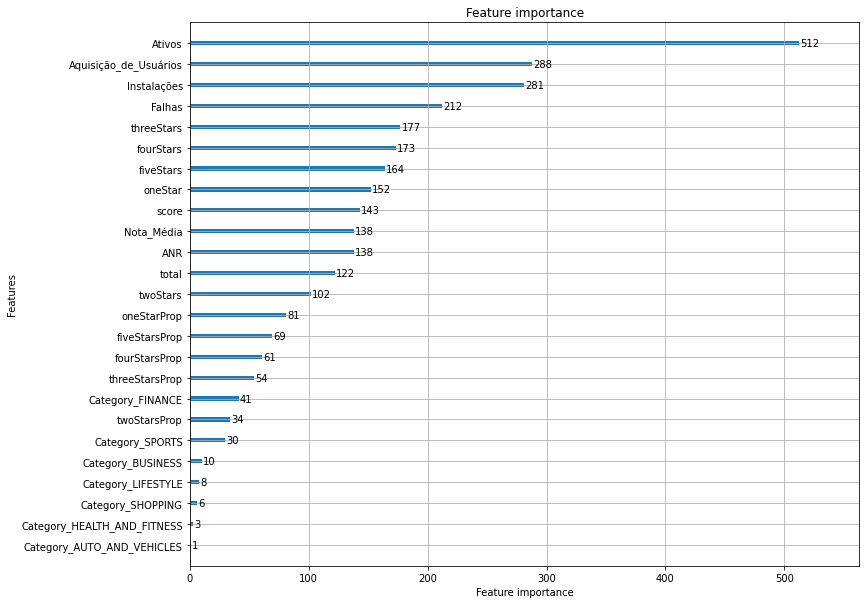

In [ ]:
lgb.plot_importance(regressor)

In [ ]:
regressor.predict(_validation)

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


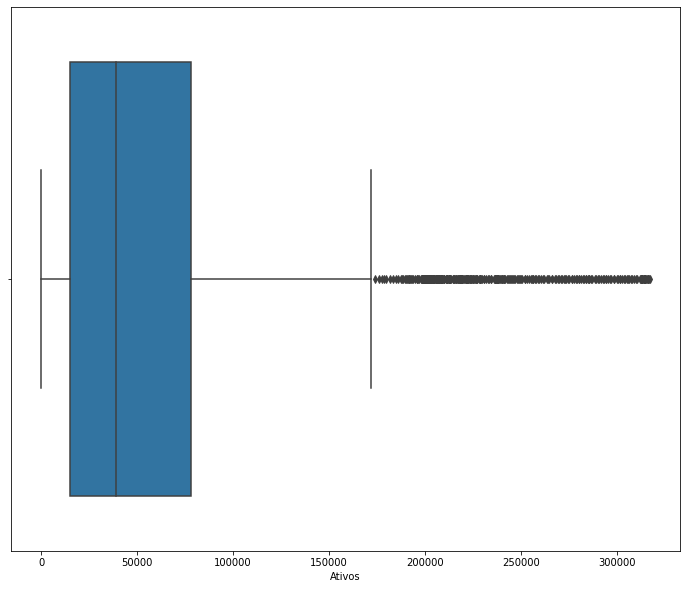

In [ ]:
sns.boxplot(_df['Ativos'])

In [ ]:
_df = _df.set_index('Data')

In [ ]:
_df.drop("poisition",axis =1 ,inplace= True)

In [ ]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6594 entries, 2020-01-01 to 2020-01-11
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ativos                       6594 non-null   int64  
 1   ANR                          6594 non-null   int64  
 2   Falhas                       6594 non-null   int64  
 3   Instalações                  6594 non-null   int64  
 4   fiveStars                    6594 non-null   int64  
 5   fourStars                    6594 non-null   int64  
 6   threeStars                   6594 non-null   int64  
 7   twoStars                     6594 non-null   int64  
 8   oneStar                      6594 non-null   int64  
 9   total                        6594 non-null   int64  
 10  score                        6594 non-null   float64
 11  Aquisição de Usuários        6594 non-null   int64  
 12  Nota Média                   6594 non-null   float64
 13  

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(_df))
print(z)


[[0.94465774 0.11953658 0.47907618 ... 0.18446826 2.09038438 0.2209772 ]
 [0.94474681 0.11953658 0.48796431 ... 0.18446826 2.09038438 0.2209772 ]
 [0.94472899 0.11953658 0.47907618 ... 0.18446826 2.09038438 0.2209772 ]
 ...
 [2.54438513 0.11914598 2.9872948  ... 0.18446826 2.09038438 0.2209772 ]
 [2.54807276 0.11885304 3.06728798 ... 0.18446826 2.09038438 0.2209772 ]
 [2.55302522 0.11836479 1.72962431 ... 0.18446826 2.09038438 0.2209772 ]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 307,  308,  309, ..., 6592, 6593, 6593]), array([25, 25, 25, ...,  8,  7,  8]))


In [ ]:
_df = _df.set_index('Data').drop("poisition",axis =1)

KeyError: ignored

In [ ]:
Q1 = _df.quantile(0.25)
Q3 = _df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Ativos                         62932.500
ANR                               19.000
Falhas                           139.000
Instalações                     1246.000
fiveStars                       4114.000
fourStars                        696.000
threeStars                       343.750
twoStars                         241.000
oneStar                         1136.000
total                           6470.750
score                              1.131
Aquisição de Usuários            868.750
Nota Média                         1.820
position                         104.000
oneStarProp                        0.210
twoStarsProp                       0.050
threeStarsProp                     0.040
fourStarsProp                      0.050
fiveStarsProp                      0.320
Category_AUTO_AND_VEHICLES         0.000
Category_BUSINESS                  0.000
Category_FINANCE                   1.000
Category_HEALTH_AND_FITNESS        0.000
Category_LIFESTYLE                 0.000
Category_SHOPPIN

In [ ]:
_df_o = _df[(z < 3).all(axis=1)]


In [ ]:
_df_out = _df[~((_df < (Q1 - 1.5 * IQR)) |(_df > (Q3 + 1.5 * IQR))).any(axis=1)]
_df_out.shape

(1654, 26)

In [ ]:
X = _df_o.drop('position',axis = 1)
y = _df_o['position']
regressor = lgb.LGBMRegressor(colsample_bytree=0.3, max_depth=3, min_split_gain=0.3,
              n_estimators=700, subsample_freq=40)
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.20, random_state = 14)

regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
#print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

Metrics results:
R2 Score: 0.927284191888599
Squared root of Mean Squared Error (RMSE): 13.38532997984594
Explained Variance: 0.9273830540256021
Mean Absolute Error (MAE): 6.760918679845853
Median Absolute Error: 3.3580969803041825


In [ ]:
regressor.predict(_validation)

array([191.4371219 , 122.13886829])

In [ ]:
X = _df_out.drop('position',axis = 1)
y = _df_out['position']
regressor = lgb.LGBMRegressor(n_estimators= 300)
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.20, random_state = 14)

regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
#print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

Metrics results:
R2 Score: 0.8451279570681707
Squared root of Mean Squared Error (RMSE): 13.196064031765781
Explained Variance: 0.8453353916775204
Mean Absolute Error (MAE): 5.5623015619668825
Median Absolute Error: 1.1637416179238471


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass sample_weight=[199.07899877 168.84441981 168.20541414 182.61027948 199.55681667
 199.95992603 200.08397042 199.44070699 198.98095495 180.20211128
 200.12109634 104.25681657 136.15994229 197.04354743 117.67601816
 118.3900359  157.98977403 199.49880542 199.6218783  123.87745161
 200.2539976  198.13819848 114.04883662 200.14373296 126.56248233
 199.59231481 195.72935608 200.11161151 138.51793431 126.78823874
 198.99048485 200.75846341 201.68750509 143.3499373  140.62565563
 201.34311631  99.75956182 199.97404691 200.83089494 158.59248443
 199.92248552 195.00553402 200.26054582 116.22771527 107.51302727
 199.60661843 175.90218065 199.38968175 199.96999563 116.46879817
 200.77696042 200.74628054 200.59612642 125.73557396 112.33149192
 114.67765251 162.56141874 104.56074616 189.98315896 198.70327774
 195.34968988 200.993685   108.54133363 200.08663513 200.54132165
 166.16383804 178.7282593  200.483327

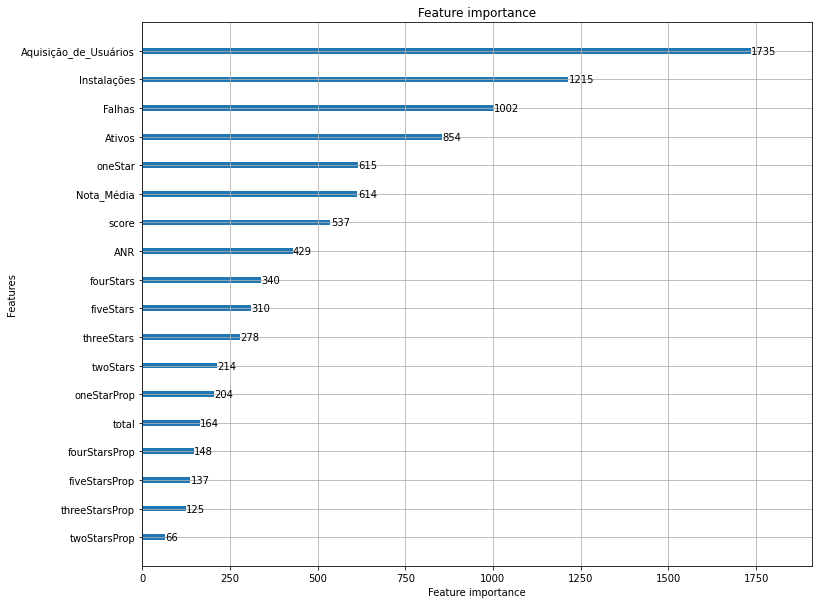

In [ ]:
lgb.plot_importance(regressor)

In [ ]:
regressor.predict(_validation)

ValueError: ignored

In [ ]:
X = _df_o.drop('position',axis = 1)
y = _df_o['position']
regressor = lgb.LGBMRegressor()
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.25, random_state = 14)

regressor.fit(X_train, y_train)
pred_i = regressor.predict(X_test)
print("Metrics results:")
print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
#print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))

Metrics results:
R2 Score: 0.9308779312725104
Squared root of Mean Squared Error (RMSE): 13.228671035501462
Explained Variance: 0.9308939347327331
Mean Absolute Error (MAE): 5.906919646461206
Median Absolute Error: 1.9424922854664999


In [ ]:
_validation= _validation.drop("Desinstalações",axis = 1)

In [ ]:
regressor.predict(_validation)

array([191.36621575, 114.16971206])

In [ ]:
_df_o.columns

Index(['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'position', 'oneStarProp',
       'twoStarsProp', 'threeStarsProp', 'fourStarsProp', 'fiveStarsProp',
       'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS', 'Category_FINANCE',
       'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS'],
      dtype='object')

In [ ]:
def model_validator_scaler(data,test_size, cols, target):
    """
    Returns metrics and feature importances after running Random Forest algorithm
    on a dataset data, following the inputation strategy strategy, with a test size defined.
    cols is a subset of features of data without including the target variable.
    """
    idata = data
    X_i = idata[cols].values
    y_i = y
    X_itrain, X_itest, y_itrain, y_itest = train_test_split(X_i, y_i, test_size=test_size, random_state=142)
    RandomForestRegModel = RandomForestRegressor(n_estimators= 300)
    model_i = RandomForestRegModel.fit(X_itrain, y_itrain)
    pred_i = model_i.predict(X_itest)
    feat_importances = pd.Series(model_i.feature_importances_, index = cols)
    feat_importances.nlargest(25).plot(kind = "barh", 
                                       figsize= (10,10), 
                                       color ="lightseagreen",
                                       alpha = 0.7,
                                       title = "Feature importance" )
    print("Metrics results:")
  
    print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
    print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
    print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
    print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
    print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
    print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))
    return model_i
def model_validator(data,test_size, cols, target):
    """
    Returns metrics and feature importances after running Random Forest algorithm
    on a dataset data, following the inputation strategy strategy, with a test size defined.
    cols is a subset of features of data without including the target variable.
    """
    idata = data
    X_i = idata[cols].values
    y_i = y
    X_itrain, X_itest, y_itrain, y_itest = train_test_split(X_i, y_i, test_size=test_size, random_state=142)
    RandomForestRegModel = RandomForestRegressor(n_estimators= 300)
    model_i = RandomForestRegModel.fit(X_itrain, y_itrain)
    pred_i = model_i.predict(X_itest)
    feat_importances = pd.Series(model_i.feature_importances_, index = cols)
    feat_importances.nlargest(25).plot(kind = "barh", 
                                       figsize= (10,10), 
                                       color ="lightseagreen",
                                       alpha = 0.7,
                                       title = "Feature importance" )
    print("Metrics results:")
  
    print("R2 Score: {}".format(r2_score(y_itest, pred_i)))
    print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_itest, pred_i))))
    print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_itest, pred_i))))
    print("Explained Variance: {}".format(explained_variance_score(y_itest, pred_i)))
    print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_itest, pred_i, pred_i)))
    print("Median Absolute Error: {}".format(median_absolute_error(y_itest, pred_i)))
    return model_i

In [ ]:
cols = ['Ativos', 'ANR', 'Falhas', 'Instalações', 'fiveStars', 'fourStars',
       'threeStars', 'twoStars', 'oneStar', 'total', 'score',
       'Aquisição de Usuários', 'Nota Média', 'oneStarProp',
       'twoStarsProp', 'threeStarsProp', 'fourStarsProp', 'fiveStarsProp',
       'Category_AUTO_AND_VEHICLES', 'Category_BUSINESS', 'Category_FINANCE',
       'Category_HEALTH_AND_FITNESS', 'Category_LIFESTYLE',
       'Category_SHOPPING', 'Category_SPORTS']
regressor = model_validator_scaler(_df,0.25,cols,"position")
regressor.predict(_validation)

ValueError: ignored

##PyCaret

In [ ]:
pip install pycaret

In [ ]:
from pycaret.regression import * 
exp_reg = setup(_df_out, target = 'position')
exp_reg

,Description,Value
0,session_id,6401
1,Target,position
2,Original Data,"(1654, 26)"
3,Missing Values,False
4,Numeric Features,25
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1157, 25)"


([],
 6401,
 False,
 False,
 [('Setup Config',                                Description             Value
   0                               session_id              6401
   1                                   Target          position
   2                            Original Data        (1654, 26)
   3                           Missing Values             False
   4                         Numeric Features                25
   5                     Categorical Features                 0
   6                         Ordinal Features             False
   7                High Cardinality Features             False
   8                  High Cardinality Method              None
   9                    Transformed Train Set        (1157, 25)
   10                    Transformed Test Set         (497, 25)
   11                      Shuffle Train-Test              True
   12                     Stratify Train-Test             False
   13                          Fold Generator             KF

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.2442,156.3689,12.2905,0.8694,0.0952,0.0473,3.848
et,Extra Trees Regressor,6.0030,164.7800,12.5321,0.8637,0.0965,0.0461,0.510
rf,Random Forest Regressor,6.1493,172.0276,12.8729,0.8586,0.0983,0.0470,0.830
xgboost,Extreme Gradient Boosting,6.6293,189.5754,13.5190,0.8435,0.1035,0.0500,0.559
gbr,Gradient Boosting Regressor,6.7264,193.2251,13.6414,0.8419,0.1041,0.0514,0.291
lightgbm,Light Gradient Boosting Machine,7.0434,201.4789,13.8840,0.8339,0.1057,0.0535,0.138
knn,K Neighbors Regressor,7.1793,250.3739,15.5089,0.7974,0.1195,0.0596,0.070
lr,Linear Regression,10.6121,248.5525,15.6483,0.7966,0.1133,0.0726,0.285
ridge,Ridge Regression,10.5926,253.0342,15.7809,0.7934,0.1149,0.0730,0.017
en,Elastic Net,10.8769,257.5787,15.9222,0.7901,0.1158,0.0746,0.026


In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.5077,342.5385,18.5078,0.7426,0.1740,0.0787
1,5.2681,98.8077,9.9402,0.9054,0.0692,0.0361
2,5.1281,129.8953,11.3972,0.8799,0.0867,0.0380
3,5.6154,95.7608,9.7857,0.9359,0.0752,0.0437
4,6.7363,187.6983,13.7003,0.8840,0.0983,0.0492
5,8.3252,251.4325,15.8566,0.7379,0.1097,0.0545
6,4.3161,87.9113,9.3761,0.9243,0.0758,0.0336
7,5.8900,163.5163,12.7873,0.8695,0.1050,0.0484
8,5.7970,174.3207,13.2031,0.8550,0.0857,0.0370
9,5.4464,115.9182,10.7665,0.9027,0.0851,0.0417


In [ ]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.5963,385.0844,19.6236,0.7107,0.1836,0.0898
1,6.6764,110.5579,10.5147,0.8942,0.0723,0.0441
2,6.8992,152.4196,12.3458,0.8590,0.0883,0.0489
3,6.7966,117.5162,10.8405,0.9213,0.0882,0.0534
4,8.3094,200.3717,14.1553,0.8762,0.1062,0.0630
5,8.3506,210.9796,14.5251,0.7801,0.0931,0.0534
6,6.4876,132.8366,11.5255,0.8857,0.0906,0.0482
7,6.7142,153.3329,12.3828,0.8777,0.1011,0.0523
8,6.9525,148.2789,12.1770,0.8767,0.0815,0.0455
9,6.3941,129.6856,11.3880,0.8911,0.0905,0.0486


In [ ]:
pred_unseen = predict_model(tuned_et, data = _validation)
pred_unseen

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS,Label
0,48375,89,96,725,2377,382,413,392,1390,4954,3396,457,3.21,0.280581,0.079128,0.083367,0.077109,0.479814,0,0,1,0,0,0,0,179.846653
1,151378,5,21,1554,1309,141,70,30,171,1721,4386,1218,5.00,0.099361,0.017432,0.040674,0.081929,0.760604,0,0,1,0,0,0,0,125.506536


In [ ]:
_validation

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
0,48375,89,96,725,2377,382,413,392,1390,4954,3396,457,3.21,0.280581,0.079128,0.083367,0.077109,0.479814,0,0,1,0,0,0,0
1,151378,5,21,1554,1309,141,70,30,171,1721,4386,1218,5.00,0.099361,0.017432,0.040674,0.081929,0.760604,0,0,1,0,0,0,0


##Redes Neurais

In [ ]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow


In [ ]:
# define the model
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
# import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

In [ ]:
model.compile(loss='mean_absolute_error',optimizer=optimizer)    # compile the model

In [ ]:
X_train.shape, y_train.shape

((3326, 25), (3326,))

In [ ]:
X = _df_o.drop('position',axis = 1)
y = _df_o['position']
X_train, X_test, y_train, y_itest = train_test_split(X,y,test_size = 0.25, random_state = 14)



In [ ]:

seed_value = 42
seed(seed_value)        # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution



# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)

Epoch 1/10
111/111 [==============================] - 0s 985us/step - loss: 376.5513
Epoch 2/10
111/111 [==============================] - 0s 979us/step - loss: 39.9535
Epoch 3/10
111/111 [==============================] - 0s 1ms/step - loss: 38.3835
Epoch 4/10
111/111 [==============================] - 0s 964us/step - loss: 38.4145
Epoch 5/10
111/111 [==============================] - 0s 1ms/step - loss: 38.4642
Epoch 6/10
111/111 [==============================] - 0s 1ms/step - loss: 38.3863
Epoch 7/10
111/111 [==============================] - 0s 1ms/step - loss: 38.2909
Epoch 8/10
111/111 [==============================] - 0s 1ms/step - loss: 38.4033
Epoch 9/10
111/111 [==============================] - 0s 998us/step - loss: 38.4402
Epoch 10/10
111/111 [==============================] - 0s 1ms/step - loss: 38.3333


In [ ]:
model.evaluate(X_test, y_itest)

35/35 [==============================] - 0s 920us/step - loss: 39.3337


39.333740234375

In [ ]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
scaler = MinMaxScaler()
_X_train = scaler.fit_transform(X_train)
_X_test = scaler.transform(X_test)

In [ ]:
# define the model
model = Sequential()
model.add(Dense(29, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_absolute_error',optimizer="adam")    # compile the model

# fit the model 
model.fit(X_train, y_train, epochs=300, batch_size=30, verbose = 1)

# evaluate the model
print('The MAE value is: ', model.evaluate(X_test, y_itest))

Epoch 1/300
111/111 [==============================] - 0s 1ms/step - loss: 417.2217
Epoch 2/300
111/111 [==============================] - 0s 1ms/step - loss: 111.0518
Epoch 3/300
111/111 [==============================] - 0s 1ms/step - loss: 107.1423
Epoch 4/300
111/111 [==============================] - 0s 1ms/step - loss: 104.4268
Epoch 5/300
111/111 [==============================] - 0s 1ms/step - loss: 94.9697
Epoch 6/300
111/111 [==============================] - 0s 1ms/step - loss: 96.2309
Epoch 7/300
111/111 [==============================] - 0s 1ms/step - loss: 95.7568
Epoch 8/300
111/111 [==============================] - 0s 1ms/step - loss: 94.2466
Epoch 9/300
111/111 [==============================] - 0s 1ms/step - loss: 86.8765
Epoch 10/300
111/111 [==============================] - 0s 1ms/step - loss: 85.8215
Epoch 11/300
111/111 [==============================] - 0s 1ms/step - loss: 96.4630
Epoch 12/300
111/111 [==============================] - 0s 1ms/step - loss: 88.68

In [ ]:
model.evaluate(X_test,y_itest)

35/35 [==============================] - 0s 1ms/step - loss: 19.0425


19.042545318603516

In [ ]:
model.predict(_validation)

array([[56549.555],
       [78017.29 ]], dtype=float32)

In [ ]:
model.save("model_appear_nn",save_format ="tf")

INFO:tensorflow:Assets written to: model_appear_nn/assets


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/model_appear_nn/saved_model')


OSError: ignored

In [ ]:
X_train

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
Data,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-05,36535,2,220,177,1609,570,593,575,2631,6226,2.617,177,2.00,0.43,0.10,0.09,0.10,0.26,0,0,1,0,0,0,0
2020-01-06,37598,2,75,1207,1609,570,593,575,2631,6226,2.617,1207,4.14,0.43,0.10,0.09,0.10,0.26,0,0,1,0,0,0,0
2020-07-05,811,88,134,811,5755,1386,542,281,672,8636,4.305,473,3.73,0.08,0.03,0.06,0.16,0.67,0,0,1,0,0,0,0
2020-04-23,3754,1,33,200,2574,466,110,61,494,3739,4.207,151,4.67,0.14,0.02,0.03,0.12,0.69,0,0,1,0,0,0,0
2020-04-02,74972,6,465,1549,2172,392,341,372,1608,4885,3.235,881,1.29,0.33,0.08,0.07,0.08,0.44,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21,1908,2,3,42,48,4,11,17,177,294,2.250,33,2.50,0.60,0.07,0.05,0.03,0.24,0,0,1,0,0,0,0
2020-07-07,28300,61,102,457,1033,240,220,170,551,2214,3.466,250,4.33,0.25,0.08,0.10,0.11,0.47,0,0,1,0,0,0,0
2020-06-03,134133,51,71,1797,988,171,50,40,30,1279,4.598,1343,4.71,0.02,0.03,0.04,0.13,0.77,0,0,1,0,0,0,0


In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
model.add(Dense(29,  activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(X_train, y_train, epochs=300, batch_size=3, verbose = 1)

# evaluate the model
print('The MAE value is: ', model.evaluate(X_test, y_itest))

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1109/1109 [==============================] - 1s 1ms/step - loss: 159.2889
Epoch 2/300
1109/1109 [==============================] - 1s 1ms/step - loss: 120.2154
Epoch 3/300
1109/1109 [==============================] - 1s 1ms/step - loss: 123.6792
Epoch 4/300
1109/1109 [==============================] - 1s 1ms/step - loss: 113.6483
Epoch 5/300
1109/1109 [==============================] - 1s 1ms/step - loss: 107.8000
Epoch 6/300
1109/1109 [==============================] - 1s 1ms/step - loss: 1

In [ ]:
_validation

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
0,48375,89,96,725,2377,382,413,392,1390,4954,3396,457,3.21,0.280581,0.079128,0.083367,0.077109,0.479814,0,0,1,0,0,0,0
1,151378,5,21,1554,1309,141,70,30,171,1721,4386,1218,5.00,0.099361,0.017432,0.040674,0.081929,0.760604,0,0,1,0,0,0,0


In [ ]:
model.predict(_validation)

array([[59296.56],
       [75840.66]], dtype=float32)

In [ ]:
pd.DataFrame(model.history.history)

""


##Pytorch

In [ ]:
X = _df_o.drop("position",axis = 1)
y = _df_o['position']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 101)

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
model.add(Dense(29,  activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(X_train, y_train, epochs=300, batch_size=3, verbose = 1)

# evaluate the model
print('The MAE value is: ', model.evaluate(X_test, y_itest))

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1183/1183 [==============================] - 1s 1ms/step - loss: 277.6009
Epoch 2/300
1183/1183 [==============================] - 1s 1ms/step - loss: 143.8071
Epoch 3/300
1183/1183 [==============================] - 1s 1ms/step - loss: 125.3308
Epoch 4/300
1183/1183 [==============================] - 1s 1ms/step - loss: 125.3622
Epoch 5/300
1183/1183 [==============================] - 1s 1ms/step - loss: 120.2802
Epoch 6/300
1183/1183 [==============================] - 1s 1ms/step - loss: 1

ValueError: ignored

In [ ]:
model.predict(_validation)

array([[60138.047],
       [78129.33 ]], dtype=float32)

##XGBOOST

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict
model = xgboost.XGBRegressor(colsample_bytree=0.3,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=5,
                 min_child_weight=0.3,
                 n_estimators=3000,
                 reg_alpha = 0.15,
                 reg_lambda = 0.15,                                                                  
                 seed=42) 

In [ ]:
model.fit(X_train,y_train)
pred_i = model.predict(X_test)
print("Metrics results:")
  
print("R2 Score: {}".format(r2_score(y_test, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_test, pred_i))))
print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_test, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_test, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_test, pred_i)))

Metrics results:
R2 Score: 0.9383774508572548
Squared root of Mean Squared Error (RMSE): 12.71827547938596
Mean squared logarithmic error (RMSLE): 0.11008801828628165
Explained Variance: 0.9383801097895866
Mean Absolute Error (MAE): 6.594755656555245
Median Absolute Error: 2.4012451171875


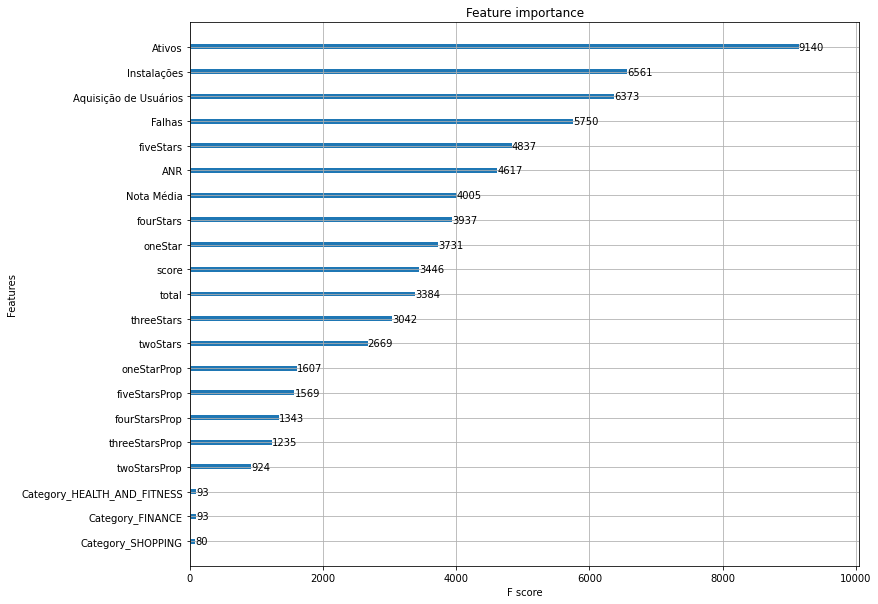

In [ ]:
plot_importance(model)

In [ ]:
model.predict(_validation)

array([177.65662, 145.91605], dtype=float32)

In [ ]:
import pickle
pickle.dump(regressor, open("model_appear_new.pkl", 'wb'))

In [ ]:
_validation

,Ativos,ANR,Falhas,Instalações,fiveStars,fourStars,threeStars,twoStars,oneStar,total,score,Aquisição de Usuários,Nota Média,oneStarProp,twoStarsProp,threeStarsProp,fourStarsProp,fiveStarsProp,Category_AUTO_AND_VEHICLES,Category_BUSINESS,Category_FINANCE,Category_HEALTH_AND_FITNESS,Category_LIFESTYLE,Category_SHOPPING,Category_SPORTS
0,48375,89,96,725,2377,382,413,392,1390,4954,3396,457,3.21,0.280581,0.079128,0.083367,0.077109,0.479814,0,0,1,0,0,0,0
1,151378,5,21,1554,1309,141,70,30,171,1721,4386,1218,5.00,0.099361,0.017432,0.040674,0.081929,0.760604,0,0,1,0,0,0,0


Metrics results:
R2 Score: 0.941340241021025
Squared root of Mean Squared Error (RMSE): 12.408764284031811
Mean squared logarithmic error (RMSLE): 0.11640032990092193
Explained Variance: 0.9413543412618344
Mean Absolute Error (MAE): 6.7150497587047004
Median Absolute Error: 2.4986114501953125


array([182.22633, 145.05382], dtype=float32)

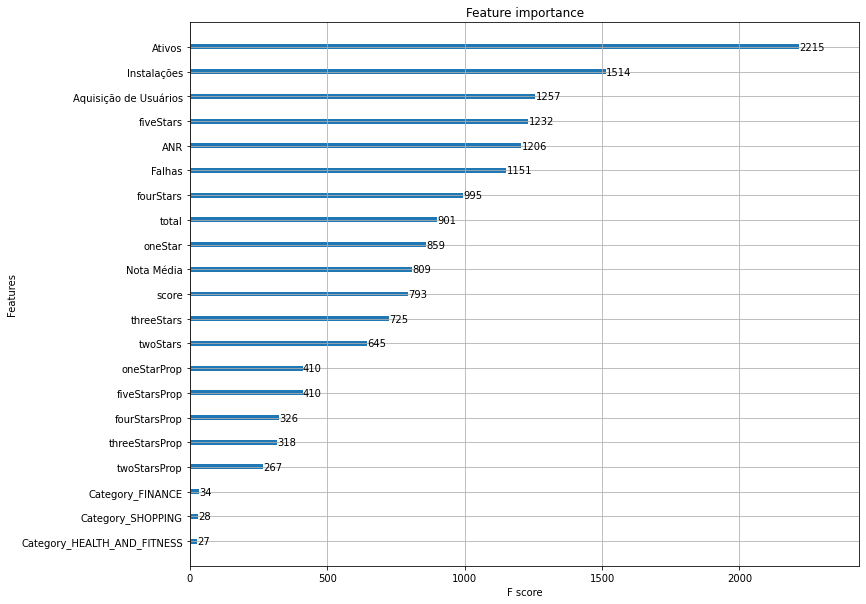

In [ ]:
model1 = xgboost.XGBRegressor(colsample_bytree=0.3,
                 gamma=0,                 
                 learning_rate=0.12,
                 max_depth=5,
                 min_child_weight=0.3,
                 n_estimators=700,
                 reg_alpha = 0.1,
                 reg_lambda = 0.1,                                                                  
                 seed=42) 
model1.fit(X_train,y_train)
pred_i = model1.predict(X_test)
print("Metrics results:")
  
print("R2 Score: {}".format(r2_score(y_test, pred_i)))
print("Squared root of Mean Squared Error (RMSE): {}".format(math.sqrt(mean_squared_error(y_test, pred_i))))
print("Mean squared logarithmic error (RMSLE): {}".format(math.sqrt(mean_squared_log_error(y_test, pred_i))))
print("Explained Variance: {}".format(explained_variance_score(y_test, pred_i)))
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, pred_i)))
print("Median Absolute Error: {}".format(median_absolute_error(y_test, pred_i)))
plot_importance(model1)
model1.predict(_validation)